In [313]:
import sys
sys.path.append('./../NeuroDataResource/')

import pickle
import itertools
import numpy as np
from scipy.signal import correlate2d
from matplotlib import pyplot as plt
from NeuroDataResource import NeuroDataResource
from skimage.filters.rank import maximum as max_filter
from skimage.filters.rank import median as median_filter
from skimage.filters.rank import minimum as min_filter
from skimage.measure import block_reduce as pool
from skimage.measure import label
from scipy.spatial.distance import euclidean as l2_dist
from scipy.signal import correlate2d
from skimage.filters import threshold_otsu
from sklearn.neighbors import KDTree
from scipy.stats import gaussian_kde
from scipy.misc import imresize
from tqdm import tqdm

In [2]:
token = pickle.load(open('./../NeuroDataResource/data/token.pkl', 'rb'))

In [3]:
myResource = NeuroDataResource(host = 'api.boss.neurodata.io',
                               token = token,
                               collection = 'collman',
                               experiment = 'collman15v2',
                               chanList = [{'name': 'annotation', 'dtype': 'uint64'},
                                           {'name': 'EM25K', 'dtype':'uint8'},
                                           {'name': 'GABA488', 'dtype':'uint8'},
                                           {'name': 'GAD647', 'dtype':'uint8'},
                                           {'name': 'gephyrin594', 'dtype':'uint8'},
                                           {'name': 'GS594', 'dtype':'uint8'},
                                           {'name': 'MBP488', 'dtype':'uint8'},
                                           {'name': 'NR1594', 'dtype':'uint8'},
                                           {'name': 'PSD95_488', 'dtype':'uint8'},
                                           {'name': 'Synapsin647', 'dtype':'uint8'},
                                           {'name': 'VGluT1_647', 'dtype':'uint8'}
                                          ])

In [252]:
cutouts = {}
for i in tqdm(range(20)):
    for key in myResource._chanList.keys():
        if not 'EM' in key:
            print(key)
            raw = myResource.get_cutout(chan=key, zRange=[i, i+1], yRange=[0, 4500], xRange=[0, 6300])[0]
            cutout = pool(raw, (36, 36), np.mean)
            if key in cutouts.keys():
                cutouts[key].append(cutout)
            else:
                cutouts[key] = [cutout]

  0%|          | 0/20 [00:00<?, ?it/s]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


  5%|▌         | 1/20 [00:32<10:15, 32.38s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 10%|█         | 2/20 [01:08<10:16, 34.26s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 15%|█▌        | 3/20 [01:40<09:27, 33.40s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 20%|██        | 4/20 [02:19<09:18, 34.92s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 25%|██▌       | 5/20 [02:52<08:36, 34.46s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 30%|███       | 6/20 [03:22<07:52, 33.77s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 35%|███▌      | 7/20 [04:01<07:29, 34.57s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 40%|████      | 8/20 [04:33<06:50, 34.18s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 45%|████▌     | 9/20 [05:06<06:14, 34.04s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 50%|█████     | 10/20 [05:41<05:41, 34.18s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 55%|█████▌    | 11/20 [06:21<05:12, 34.70s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 60%|██████    | 12/20 [06:56<04:37, 34.71s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 65%|██████▌   | 13/20 [07:28<04:01, 34.49s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 70%|███████   | 14/20 [08:06<03:28, 34.72s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 75%|███████▌  | 15/20 [08:38<02:52, 34.55s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 80%|████████  | 16/20 [09:13<02:18, 34.58s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 85%|████████▌ | 17/20 [09:43<01:42, 34.29s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 90%|█████████ | 18/20 [10:21<01:09, 34.52s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


 95%|█████████▌| 19/20 [10:51<00:34, 34.30s/it]

annotation
Synapsin647
PSD95_488
gephyrin594
VGluT1_647
NR1594
MBP488
GABA488
GAD647
GS594


100%|██████████| 20/20 [11:21<00:00, 34.07s/it]


In [253]:
pickle.dump(cutouts, open('downsample_mean_collman15.pkl', 'wb'))

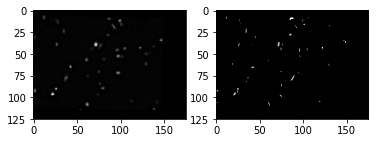

In [255]:
plt.figure()
plt.subplot(121)
plt.imshow(cutouts['PSD95_488'][10] , cmap='gray')
plt.subplot(122)
plt.imshow(cutouts['annotation'][10], cmap='gray')
plt.show()

In [256]:
def compute_pairwise_vol_cov(vol1, vol2, local_shape):
    e1 = pool(vol1, local_shape, np.mean)
    e2 = pool(vol2, local_shape, np.mean)
    
    s1 = pool(vol1, local_shape, np.std)
    s2 = pool(vol2, local_shape, np.std)
    
    e12 = pool(np.log(np.exp(vol1)+np.exp(vol2)), local_shape, np.mean)
    
    cov = e12 - np.log(np.exp(e1) + np.exp(e2))
    
    return cov

In [257]:
def z_transform(img):
    sigma = np.std(img)
    mu = np.average(img)
    return (img - mu)/sigma

In [258]:
covMap = compute_pairwise_vol_cov(np.stack([z_transform(elem) for elem in cutouts['PSD95_488']]),
                                  np.stack([z_transform(elem) for elem in cutouts['NR1594']]),
                                  (2, 10, 10))

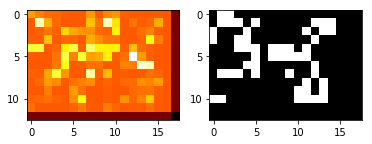

In [259]:
plt.figure()
plt.subplot(121)
plt.imshow(covMap[6], cmap='hot')

plt.subplot(122)
plt.imshow(pool(cutouts['annotation'][6], (10,10)) > 0, cmap='gray')

plt.show()

In [266]:
def do_covariance_mag_sim(cutouts, selem, norm = True, plot=True):
    sim_chans = [elem for elem in cutouts.keys()\
                 if not 'annot' in elem and not 'EM' in elem]
    
    downsamp_annot = pool(np.stack(cutouts['annotation']), selem, np.max)
   
    combs = itertools.combinations(sim_chans, 2)
    xs = np.linspace(0.,1.,100)
    
    resultList = []
    i=1
    plt.figure(figsize = (20, 20))
    for achan, bchan in combs:
        
        covMap = compute_pairwise_vol_cov(np.stack([z_transform(elem) for elem in cutouts[achan]]),
                                          np.stack([z_transform(elem) for elem in cutouts[bchan]]),
                                          selem)
        covMap = np.nan_to_num(covMap)
        if plot:
            ax = plt.subplot(6, 6, i)
            '''
            if not (i-1)%6:
                ax.set_ylabel(achan)
            if i >= 31:
                ax.set_xlabel(achan)
            print(achan, bchan)
            '''''
            if norm:
                pos_kde = gaussian_kde(covMap[downsamp_annot > 0])
                neg_kde = gaussian_kde(covMap[downsamp_annot == 0])
                plt.plot(xs, pos_kde(xs)/np.max(pos_kde(xs)), c='g')
                plt.plot(xs, neg_kde(xs)/np.max(neg_kde(xs)), c='r')

            else:
                pos_kde = gaussian_kde(covMap[downsamp_annot > 0])
                neg_kde = gaussian_kde(covMap[downsamp_annot == 0])
                plt.plot(xs, pos_kde(xs), c='g')
                plt.plot(xs, neg_kde(xs), c='r')

        resultList.append([achan, bchan, covMap])
        i+=1
       
    if plot:
        plt.show()
        
    return resultList


/home/bstadt/Neurodata/nomadenv/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


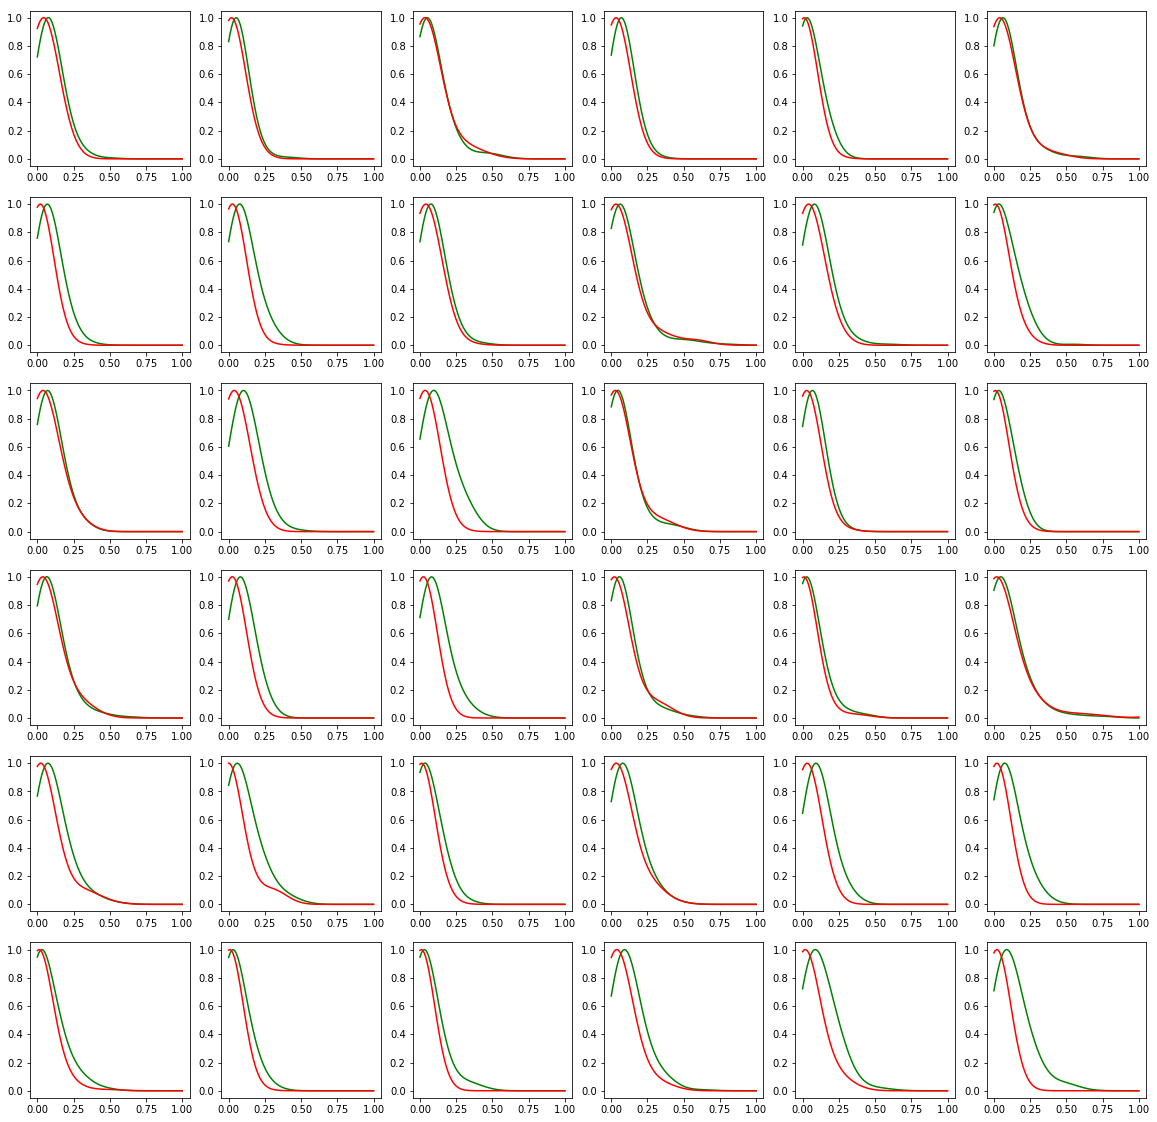

In [262]:
output = do_covariance_mag_sim(cutouts, (9, 11, 11))

/home/bstadt/Neurodata/nomadenv/lib/python3.5/site-packages/scipy/stats/kde.py:222: RuntimeWarning: underflow encountered in exp
  result[i] = sum(exp(-energy), axis=0)
/home/bstadt/Neurodata/nomadenv/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


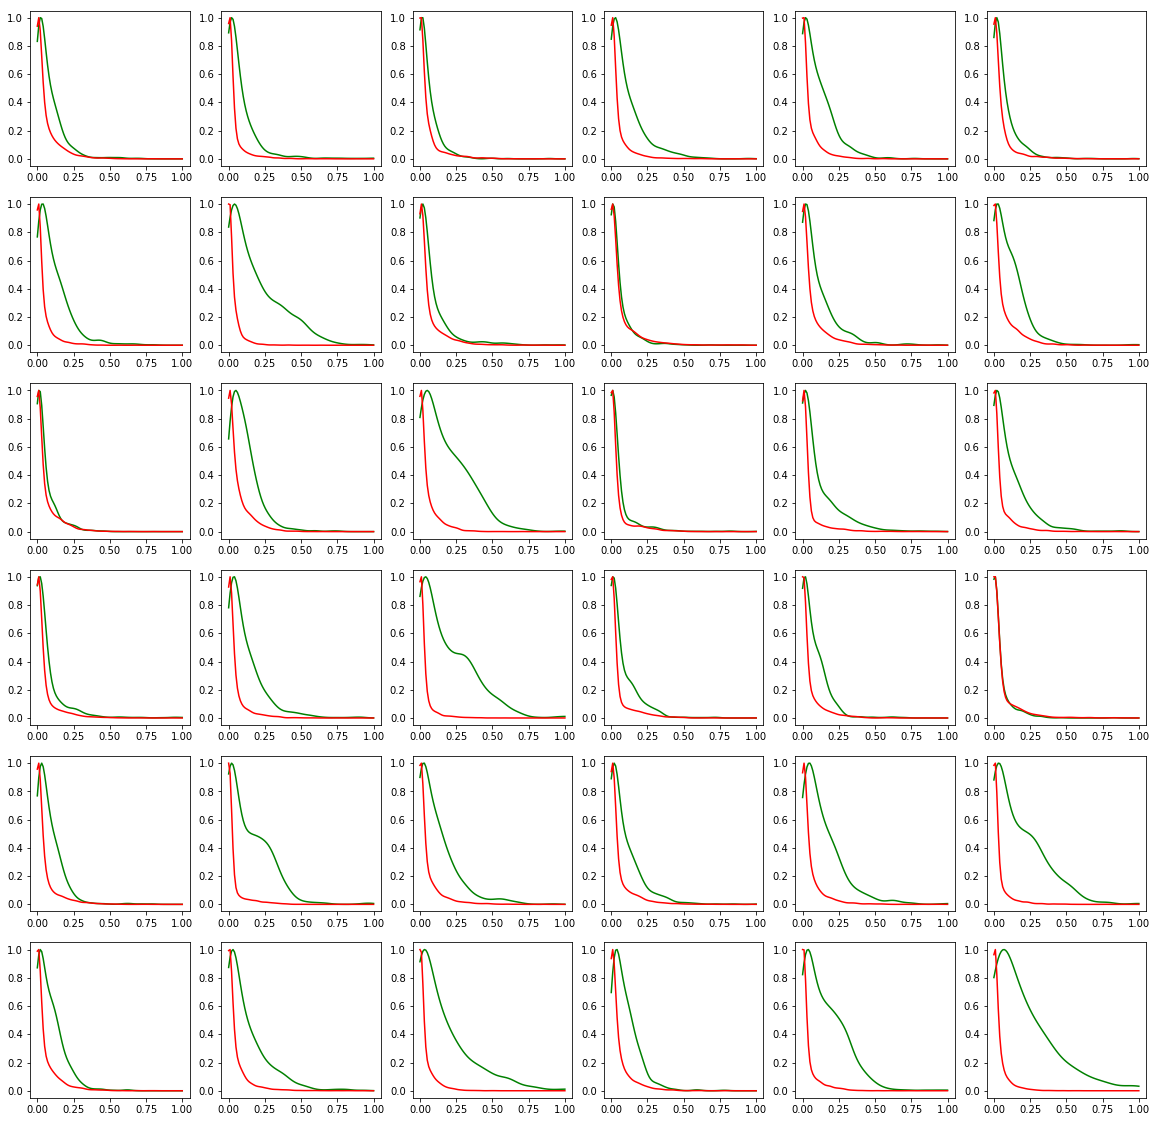

In [268]:
results = do_covariance_mag_sim(cutouts, (3, 5, 5), norm=True)
covMaps = [elem[2] for elem in results]

In [289]:
def do_selem_sim(norm = True):
    
    xs = np.linspace(0.,1.,100)
    
    plt.figure(figsize=(20, 20))
   
    i=1
    for z in [3, 5, 7, 9]:
        for xy in [3, 5, 7, 9, 11]:
            
            downsamp_annot = pool(np.stack(cutouts['annotation']), (z, xy, xy), np.max)
            print(z, xy, xy)
            output = do_covariance_mag_sim(cutouts, (z, xy, xy), plot=True, norm=norm)
            '''
            cov_maps = [elem[2] for elem in output]
            
            ssp_cov = np.sum(np.power(np.stack(cov_maps), 2), axis=0)
            
            pos_kde = gaussian_kde(ssp_cov[downsamp_annot > 0])
            neg_kde = gaussian_kde(ssp_cov[downsamp_annot == 0])
            
            ax = plt.subplot(4, 5, i)
            i+=1
            if not (i-1) % 5:
                ax.set_ylabel(z)
            if z == 9:
                ax.set_xlabel(xy)
                
            plt.plot(xs, pos_kde(xs)/np.max(pos_kde(xs)), c='g')
            plt.plot(xs, neg_kde(xs)/np.max(neg_kde(xs)), c='r')
            '''
            
    #plt.show() 
    

3 3 3


/home/bstadt/Neurodata/nomadenv/lib/python3.5/site-packages/scipy/stats/kde.py:222: RuntimeWarning: underflow encountered in exp
  result[i] = sum(exp(-energy), axis=0)
/home/bstadt/Neurodata/nomadenv/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


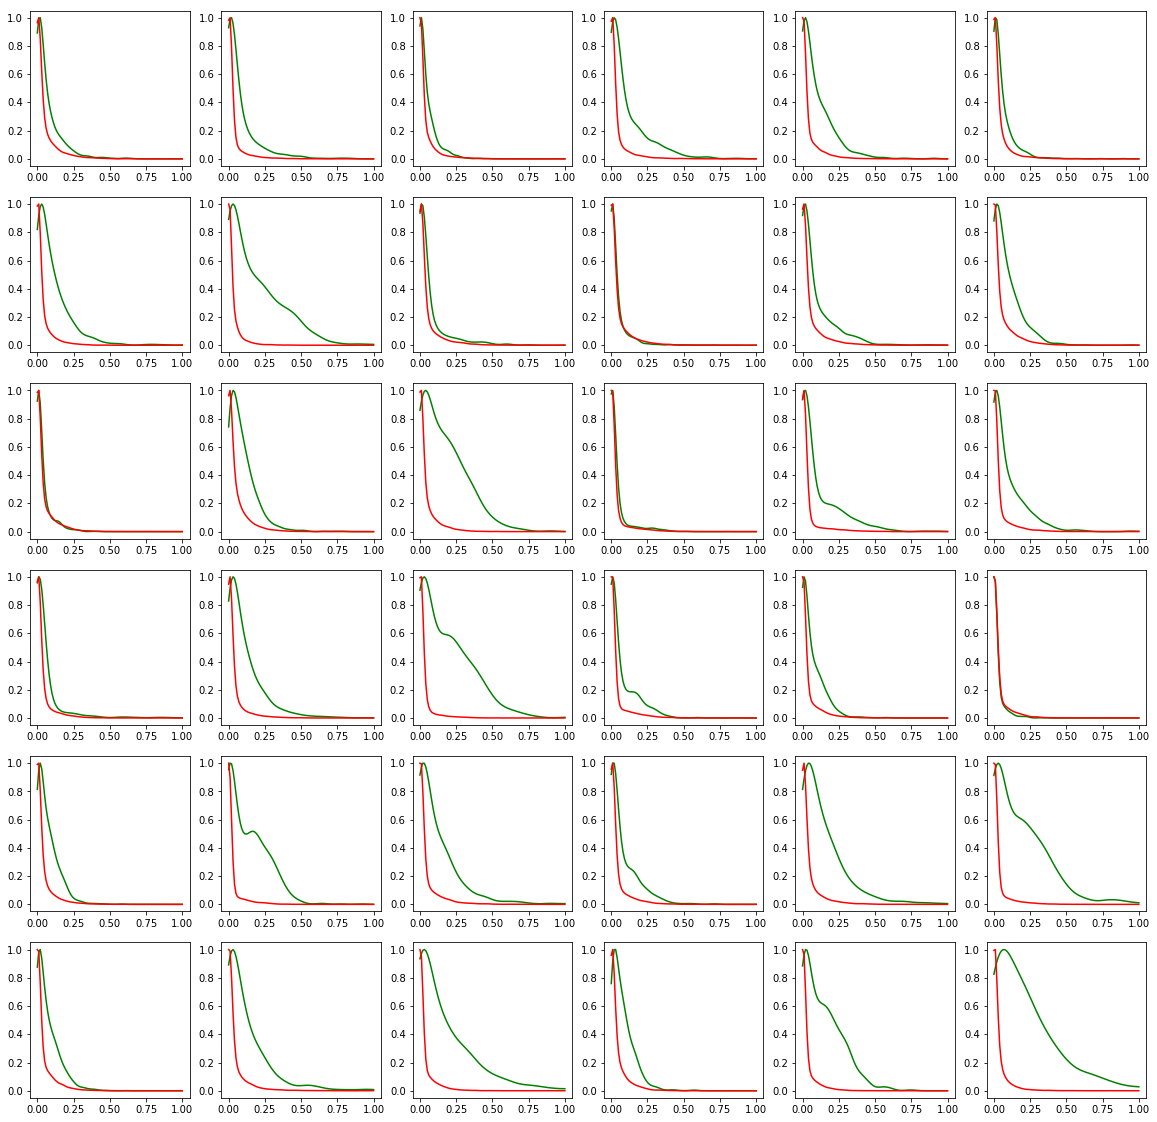

3 5 5


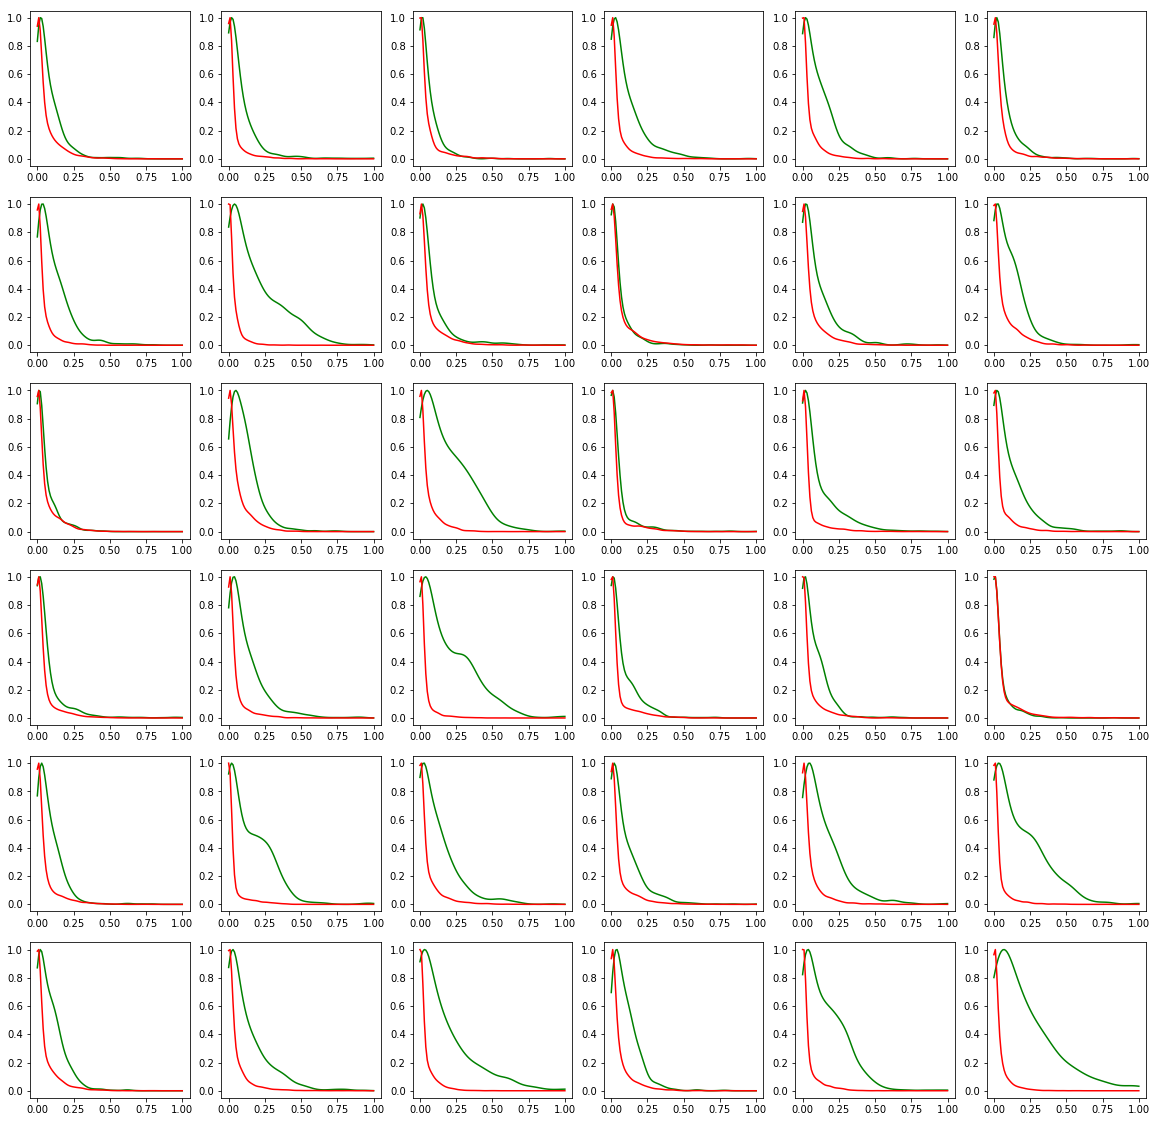

3 7 7


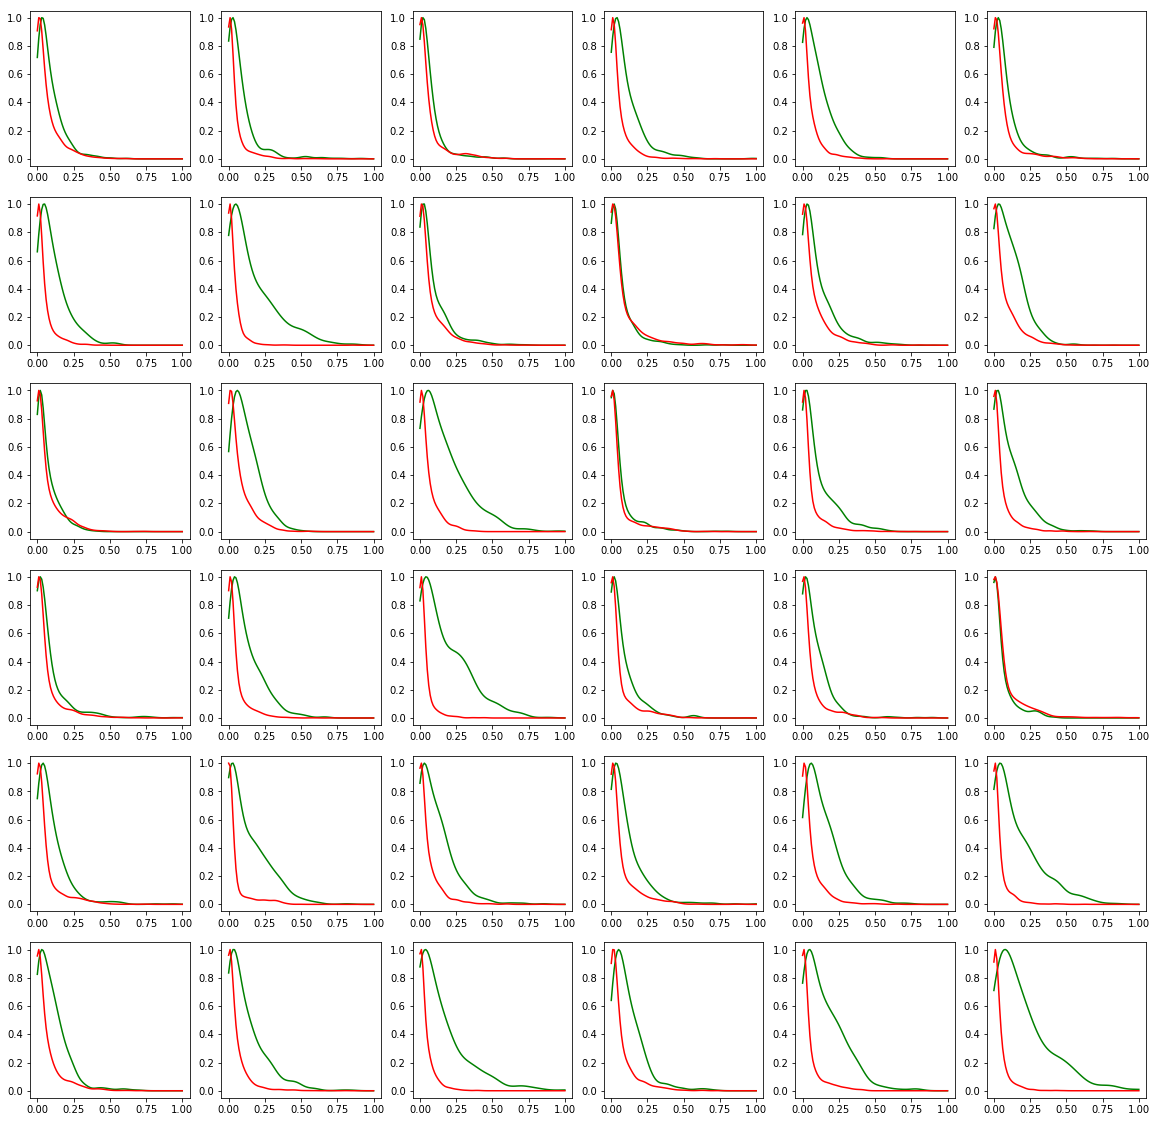

3 9 9


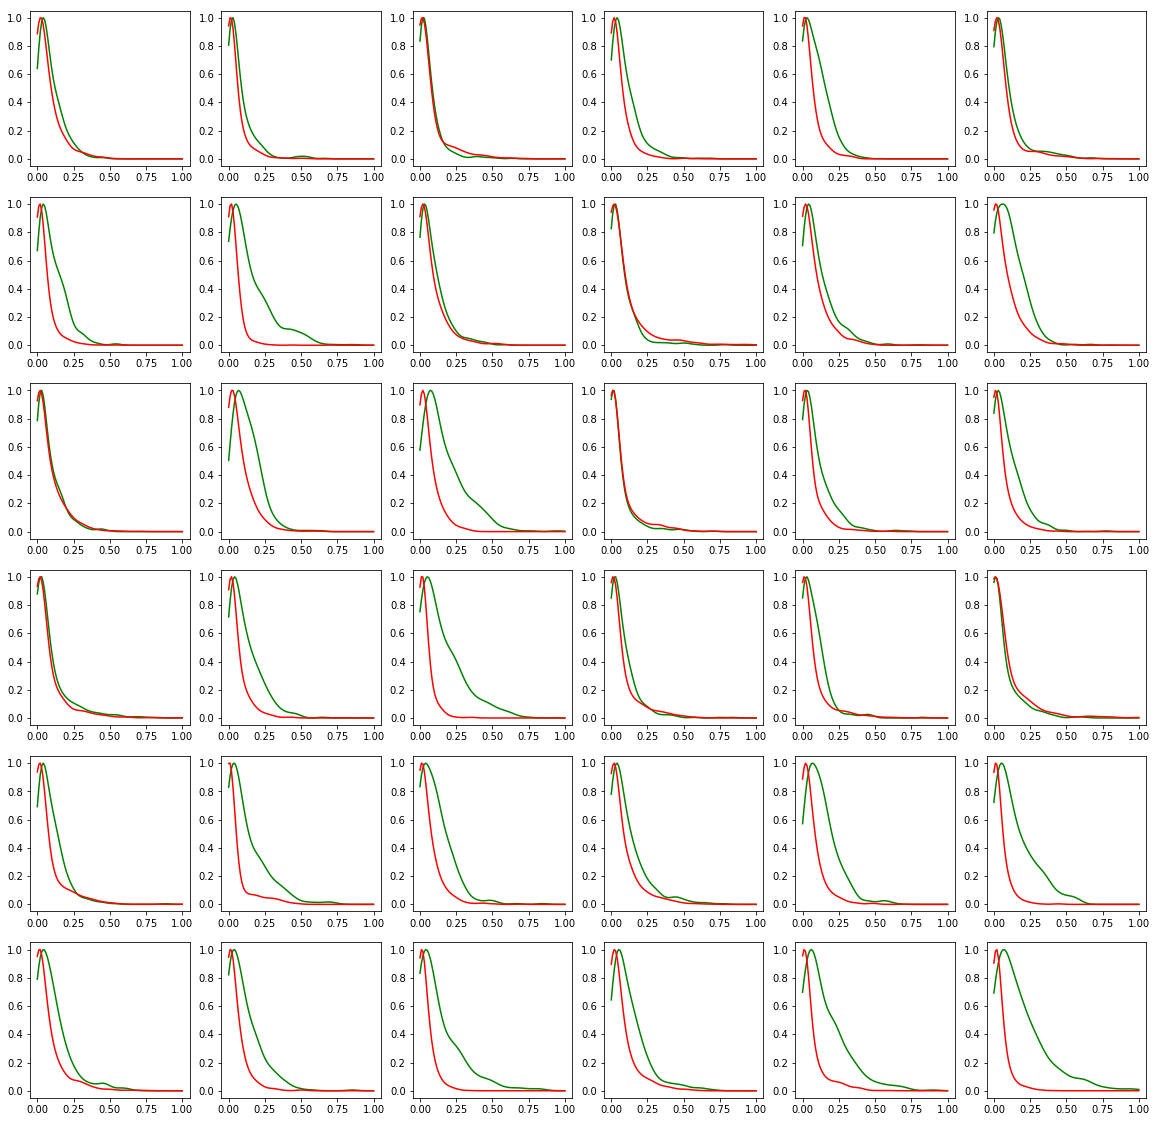

3 11 11


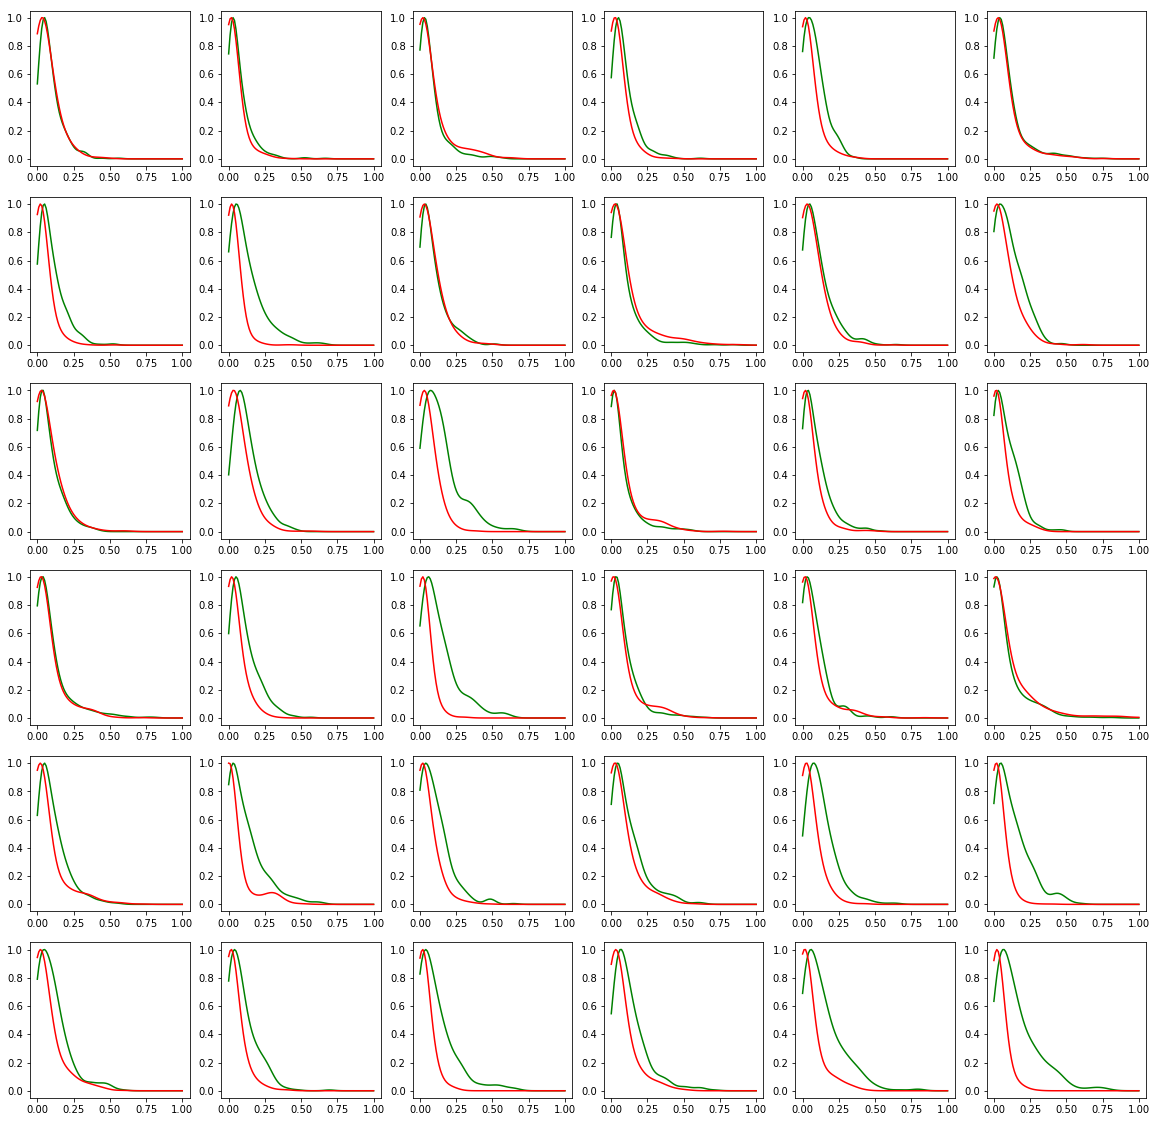

5 3 3


/home/bstadt/Neurodata/nomadenv/lib/python3.5/site-packages/scipy/stats/kde.py:224: RuntimeWarning: underflow encountered in true_divide
  result = result / self._norm_factor
/home/bstadt/Neurodata/nomadenv/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: underflow encountered in true_divide


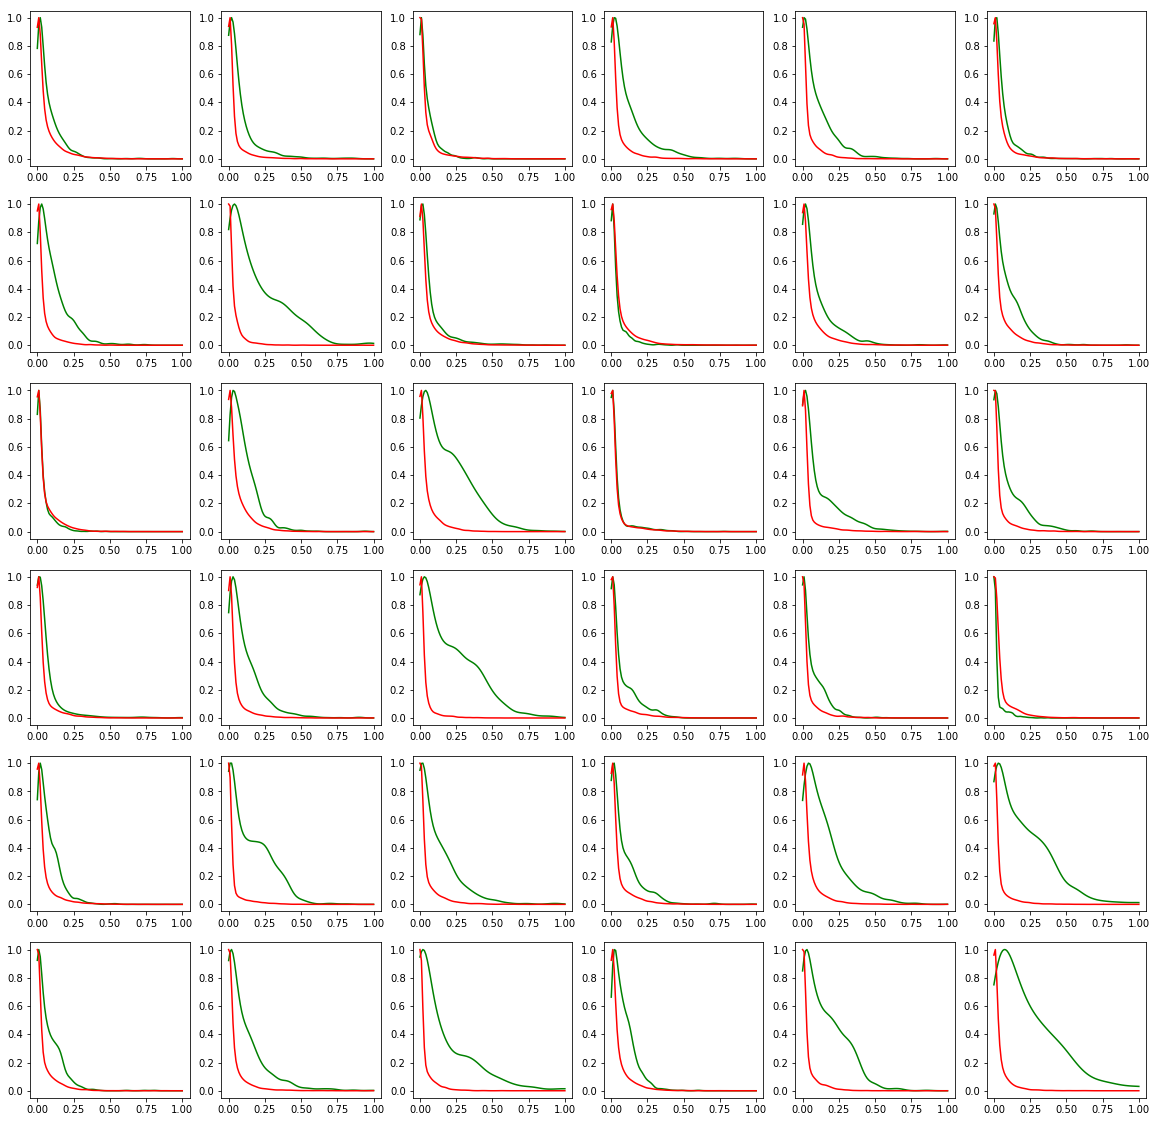

5 5 5


/home/bstadt/Neurodata/nomadenv/lib/python3.5/site-packages/ipykernel_launcher.py:31: RuntimeWarning: underflow encountered in true_divide


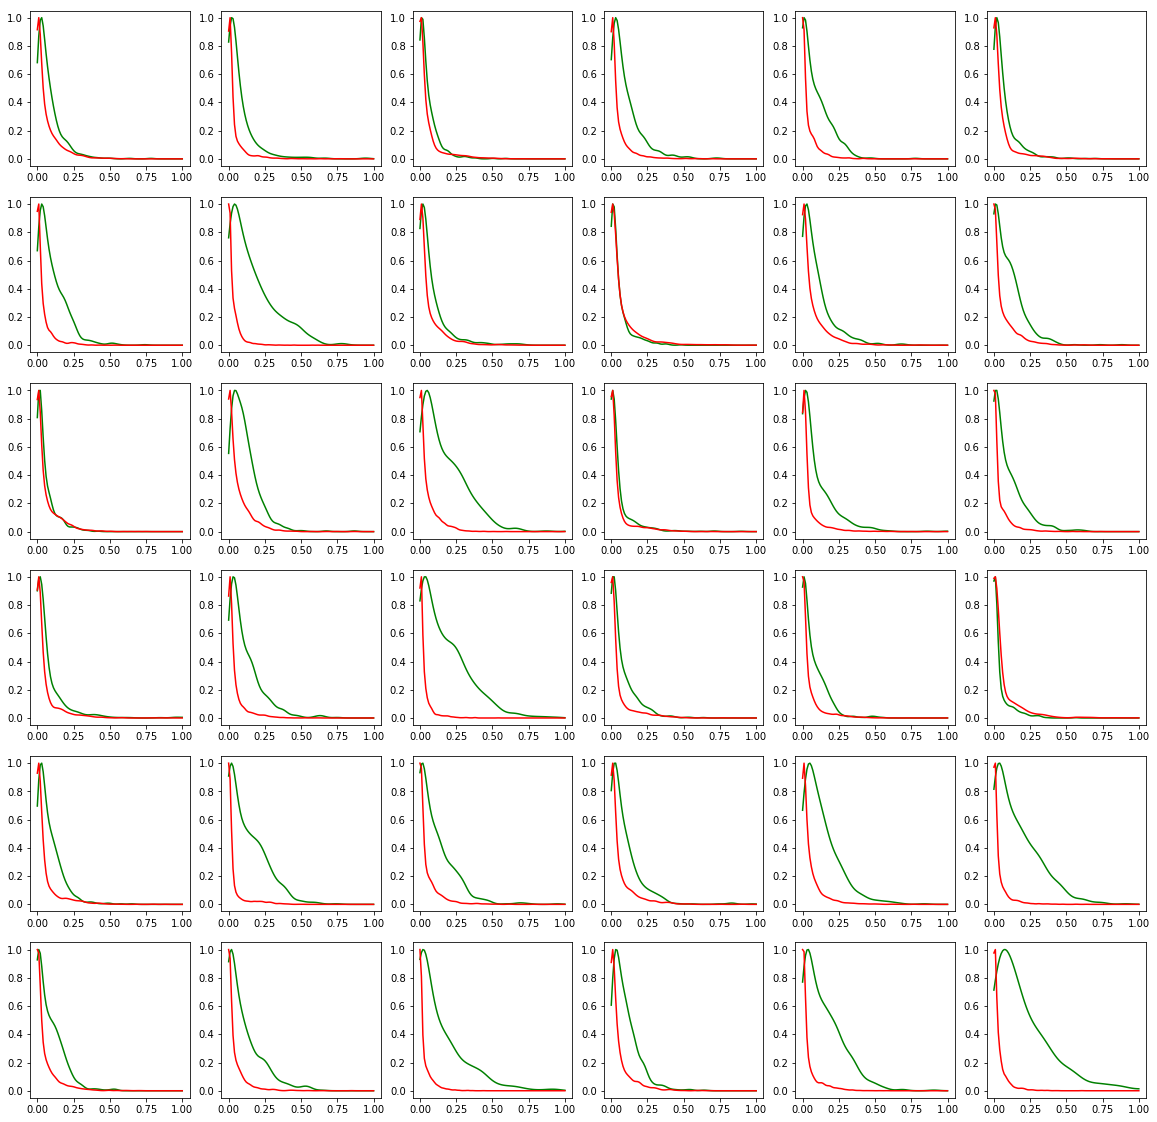

5 7 7


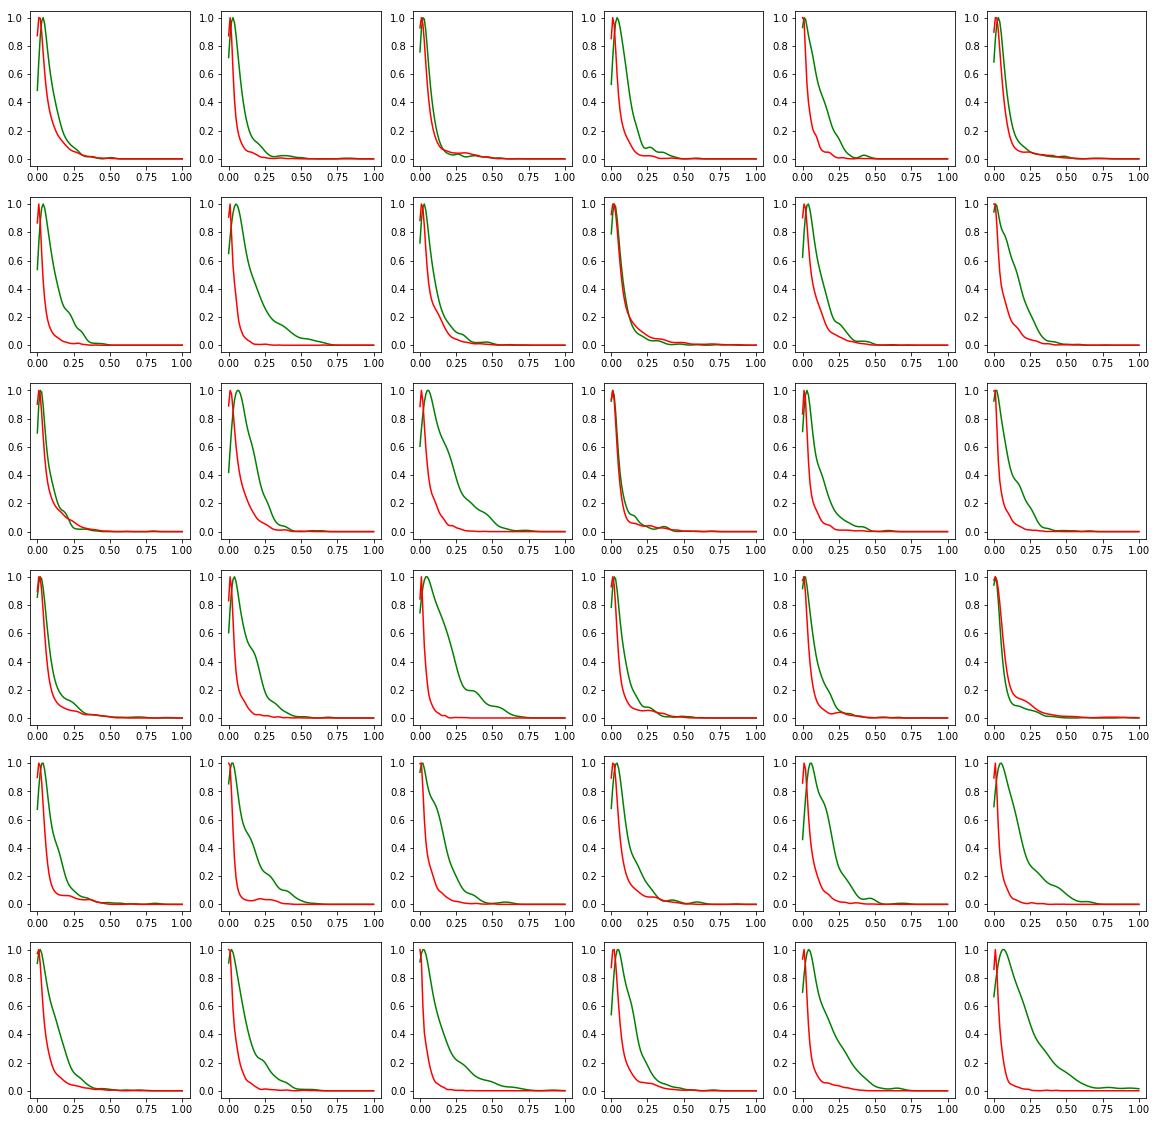

5 9 9


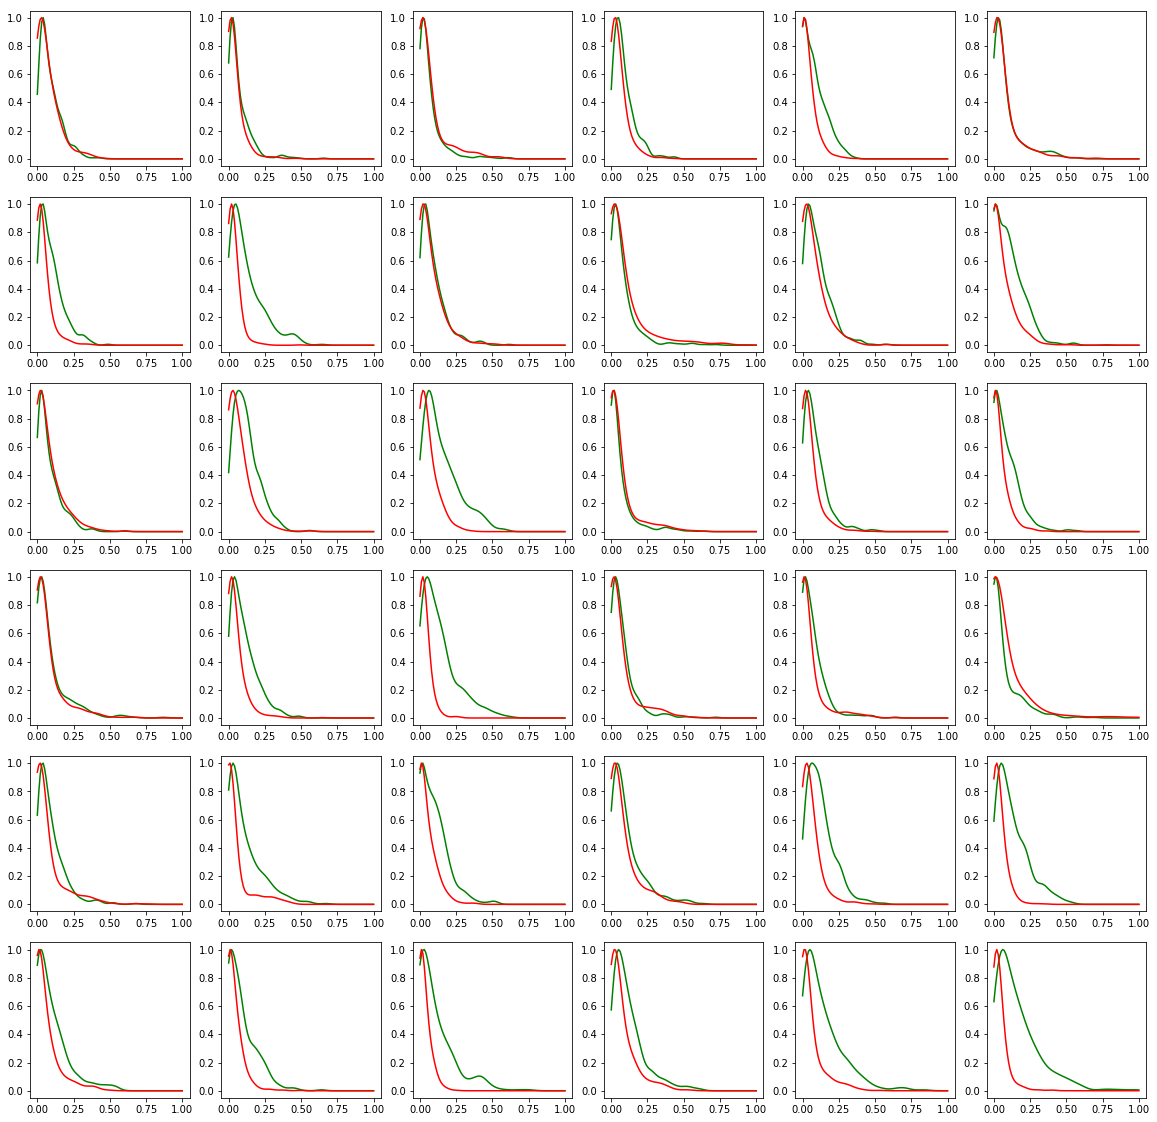

5 11 11


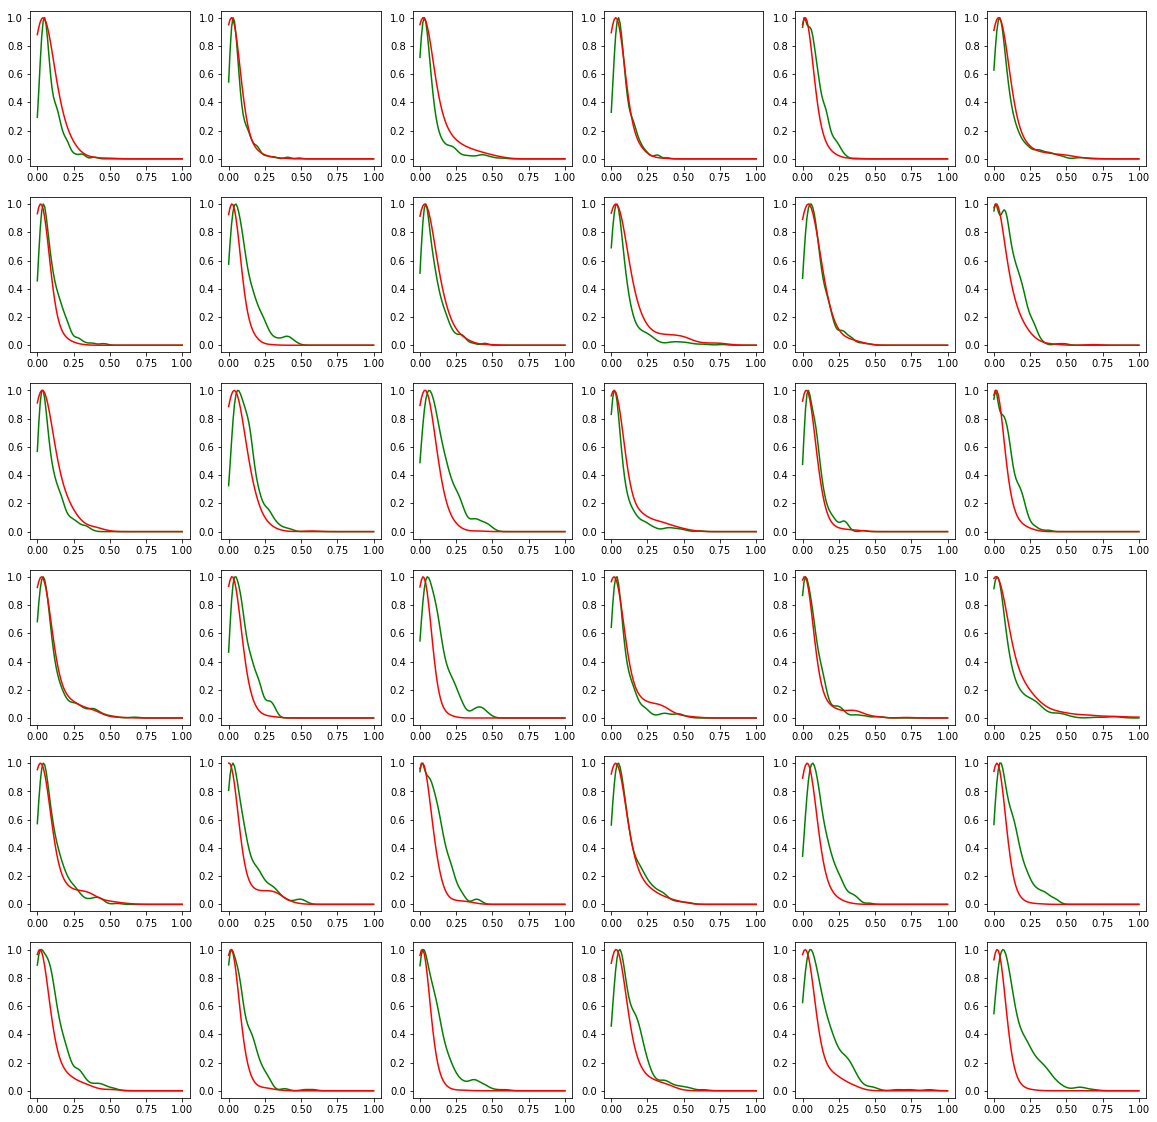

7 3 3


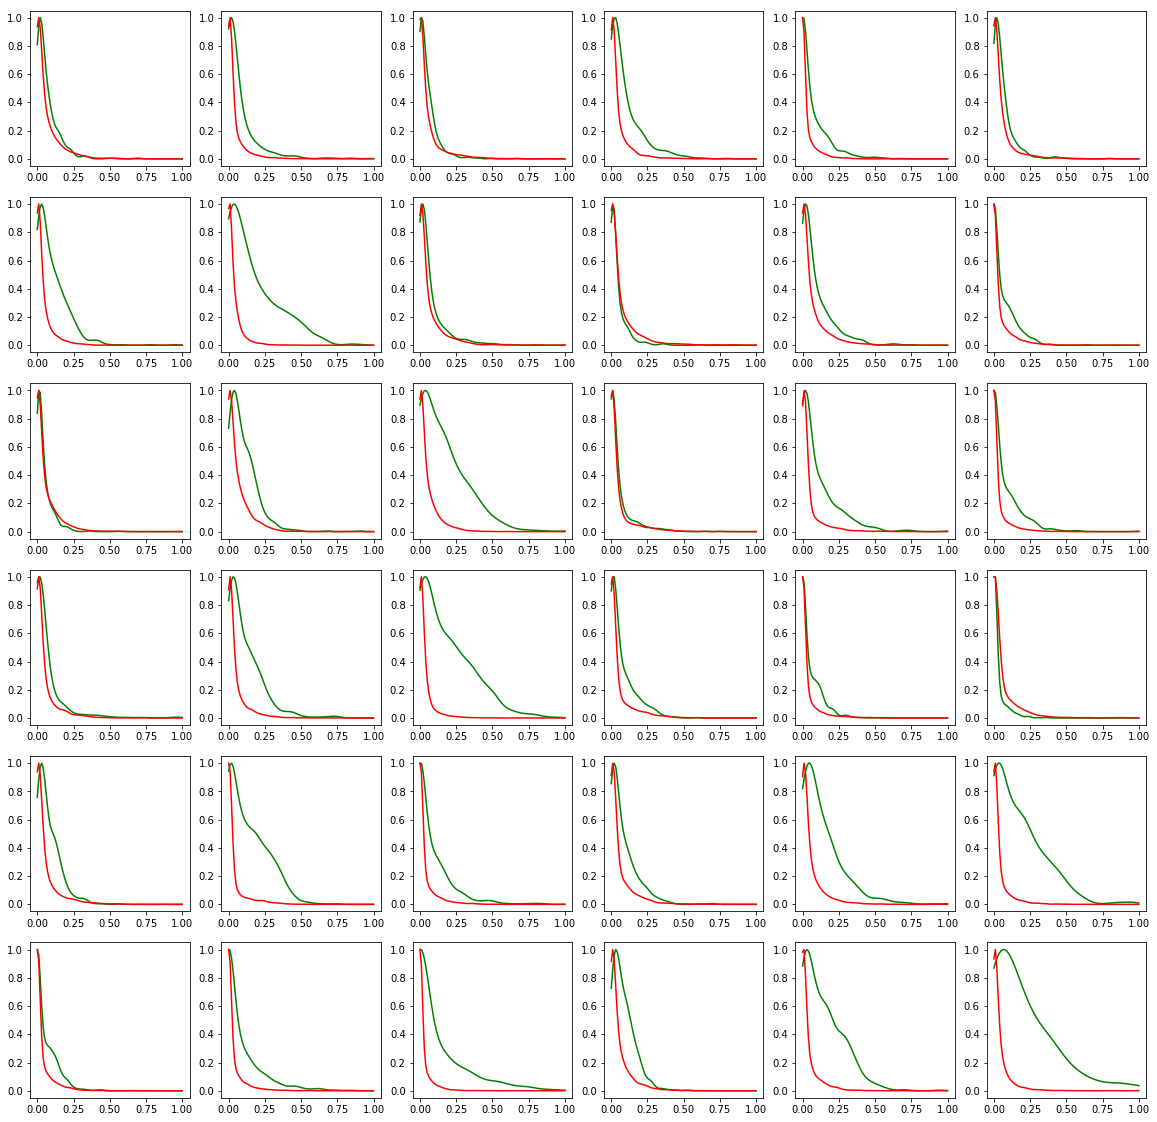

7 5 5


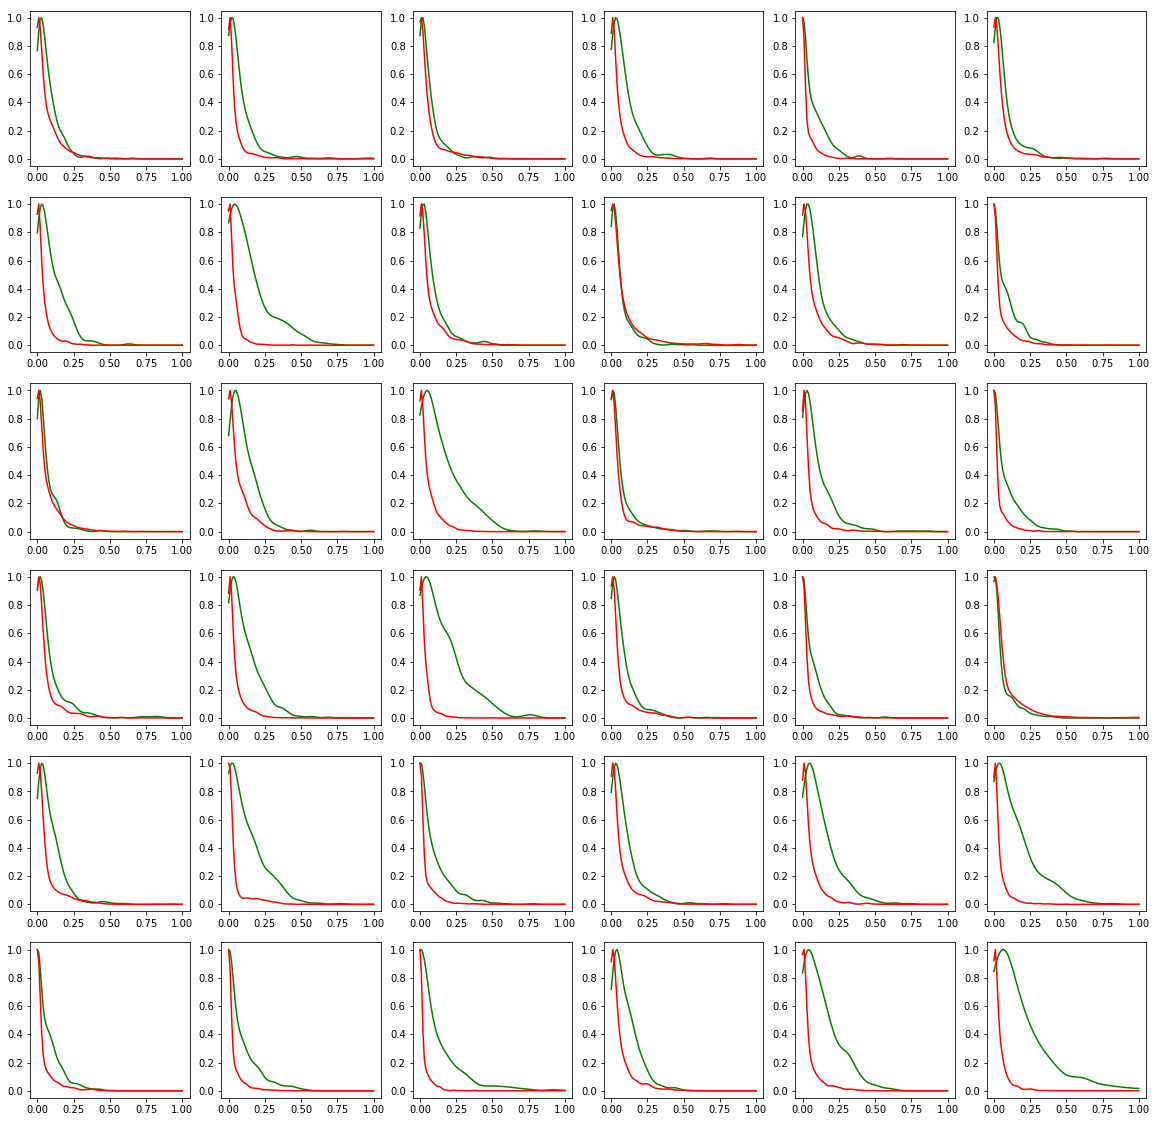

7 7 7


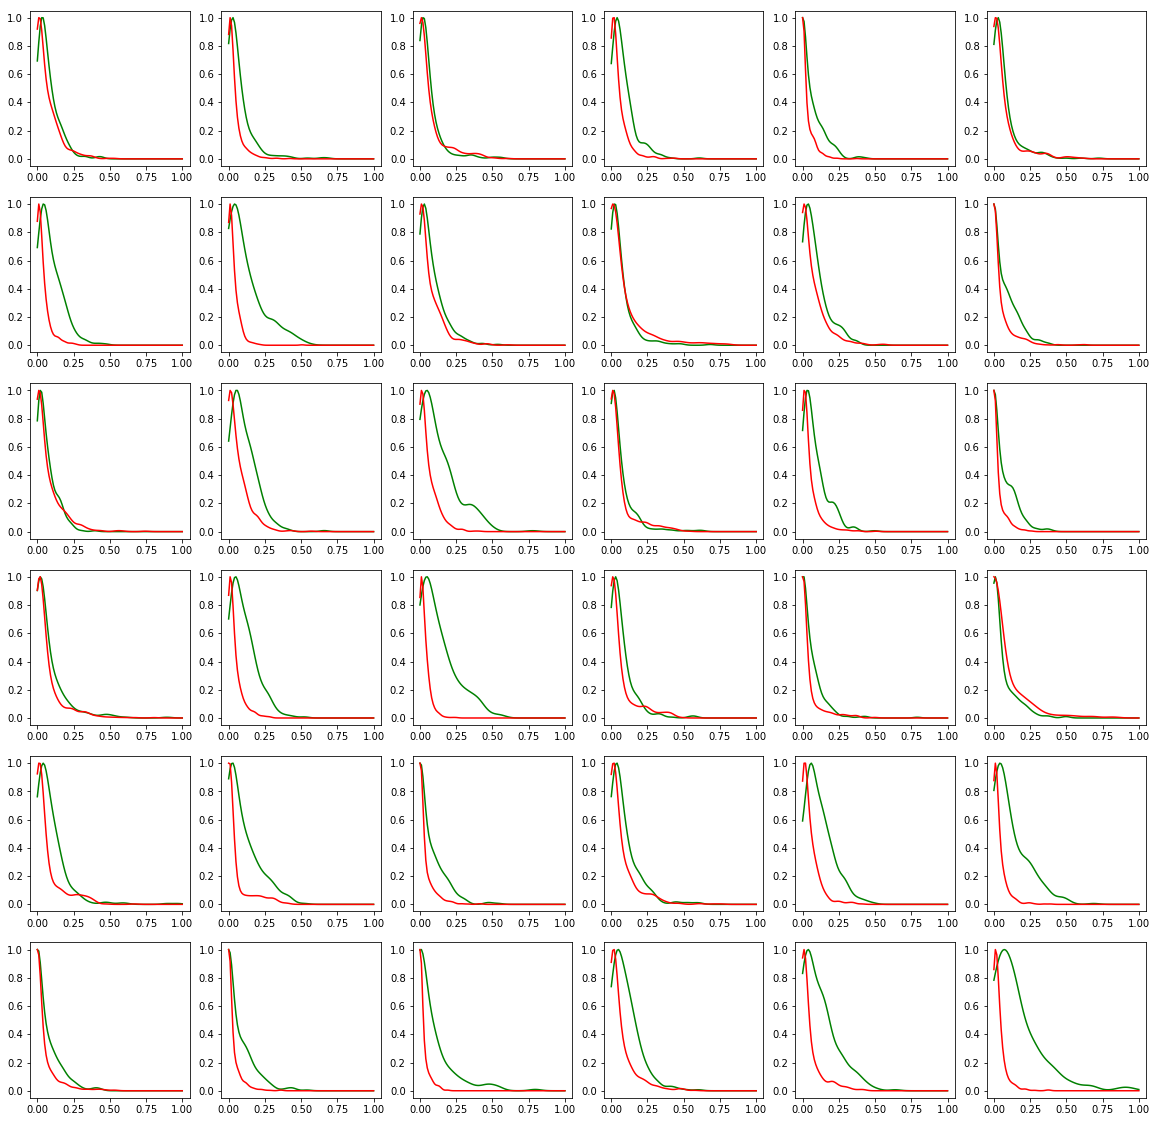

7 9 9


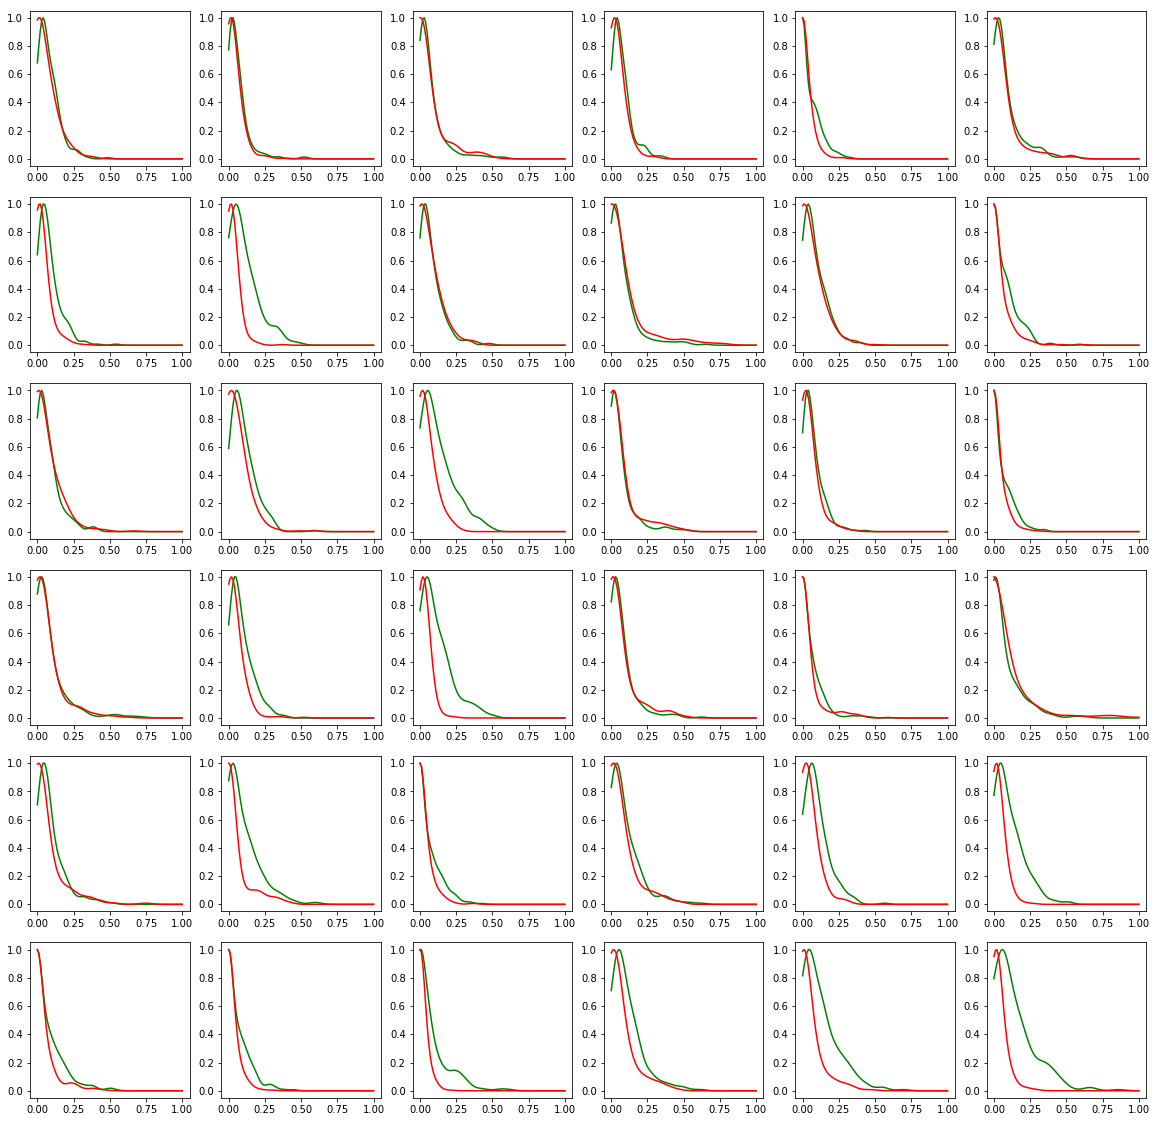

7 11 11


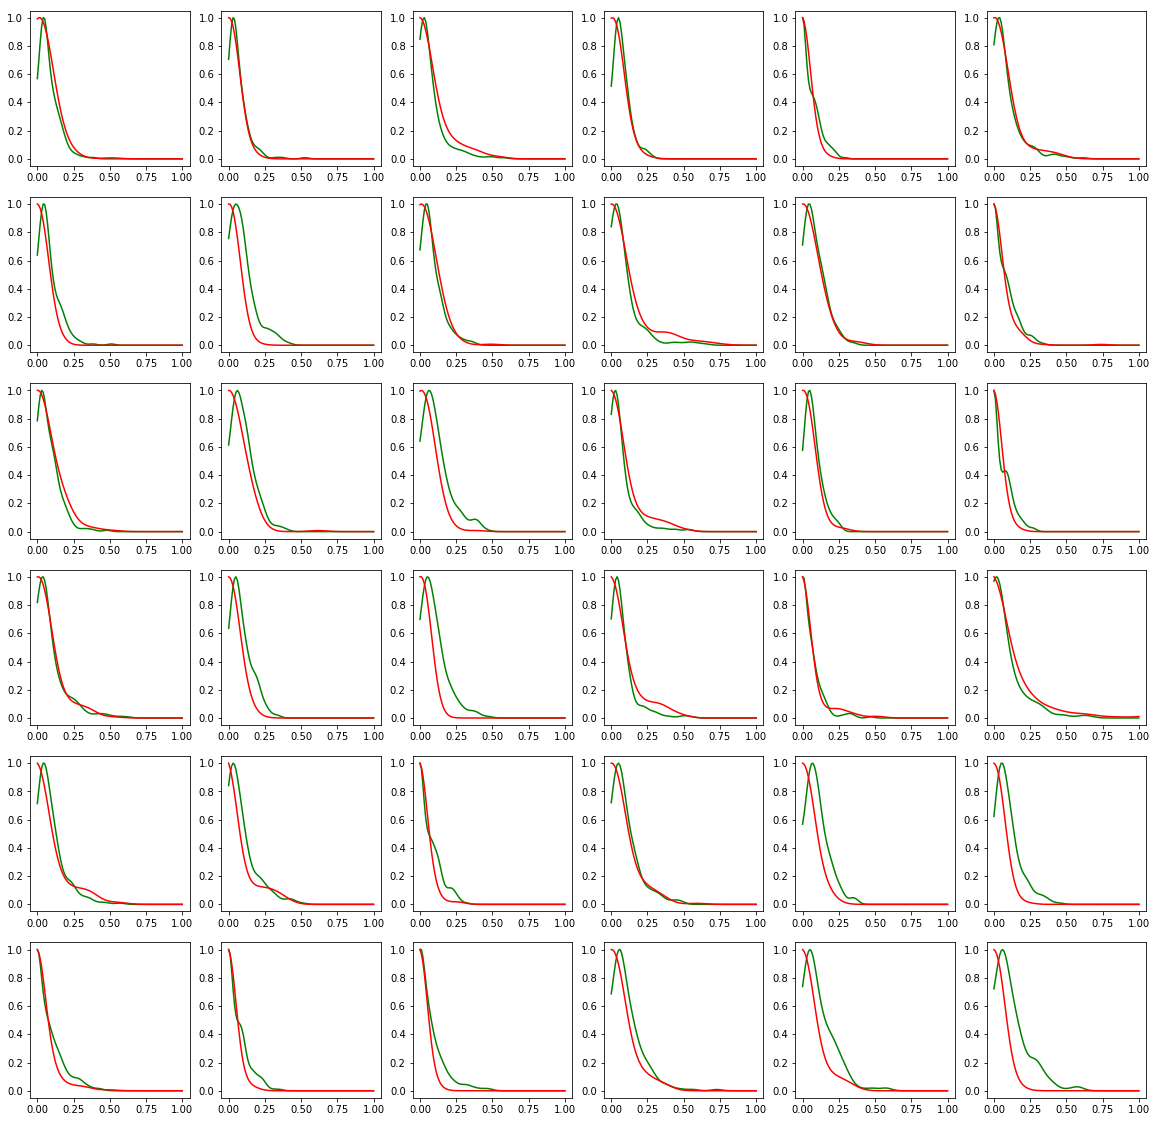

9 3 3


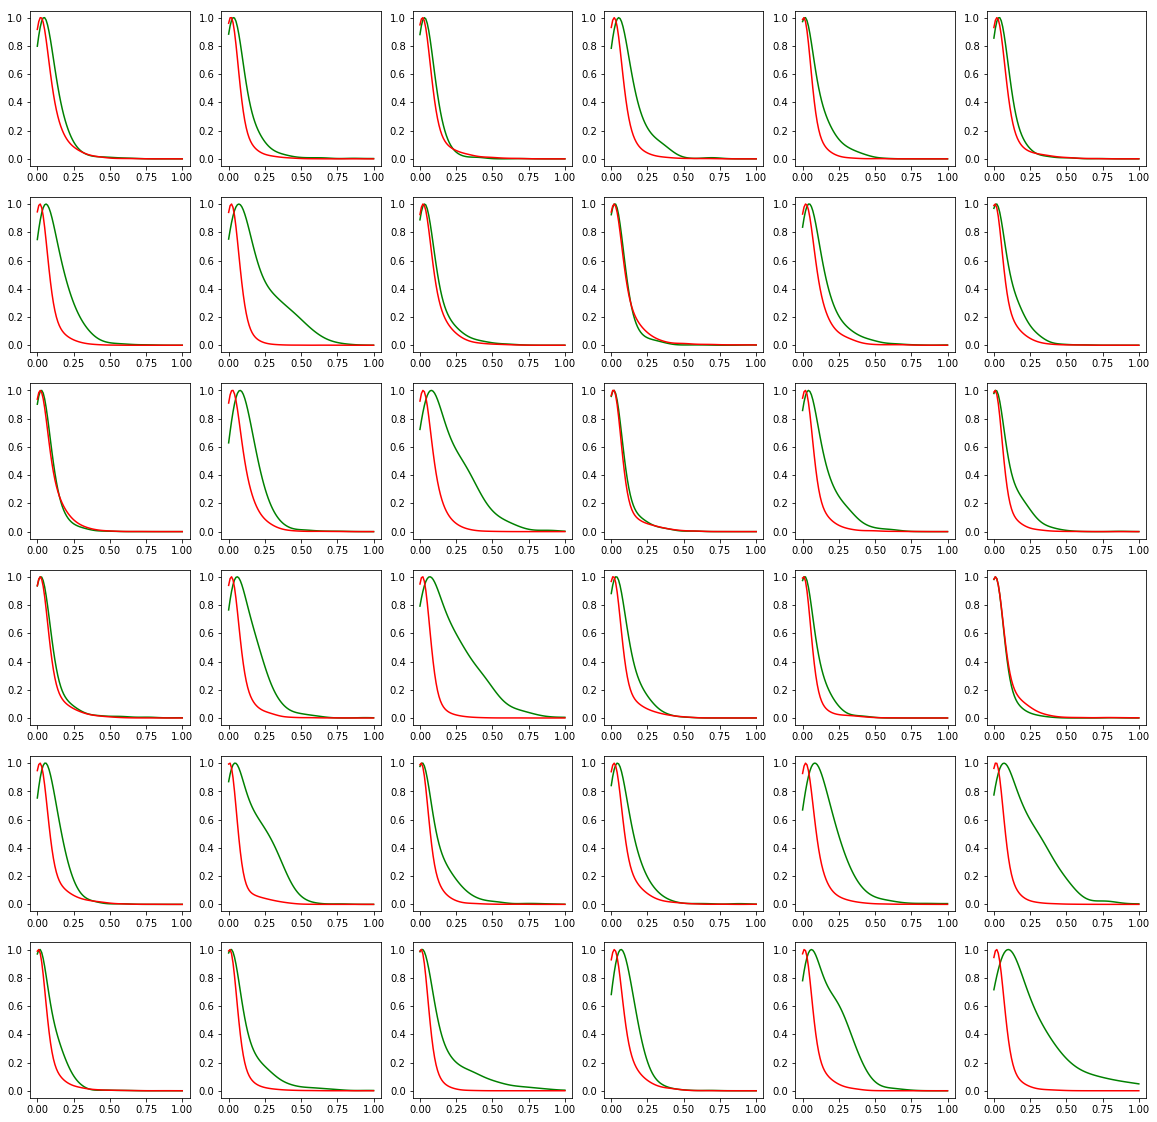

9 5 5


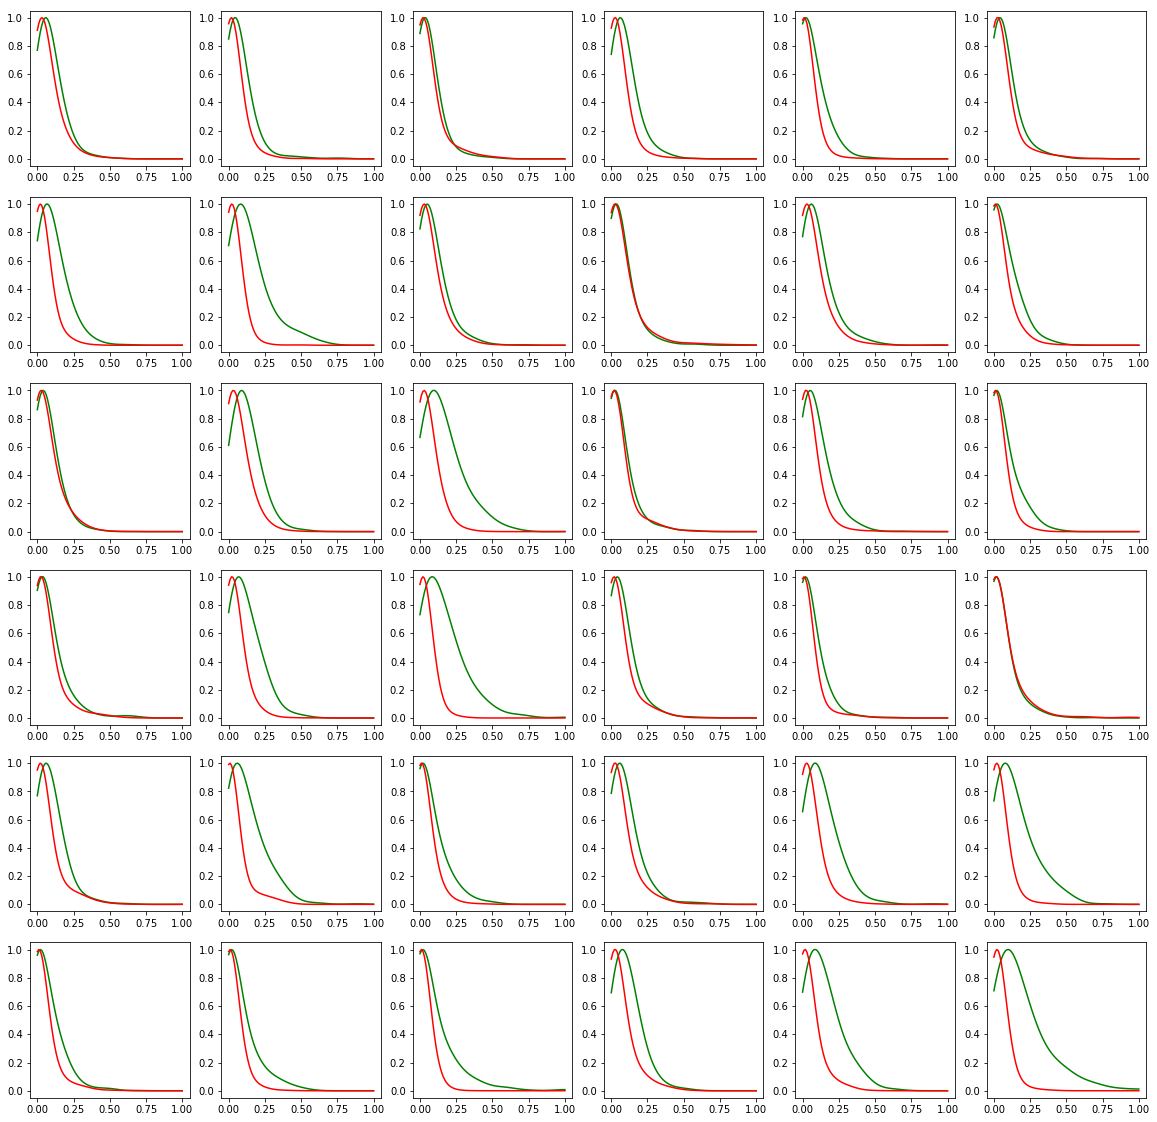

9 7 7


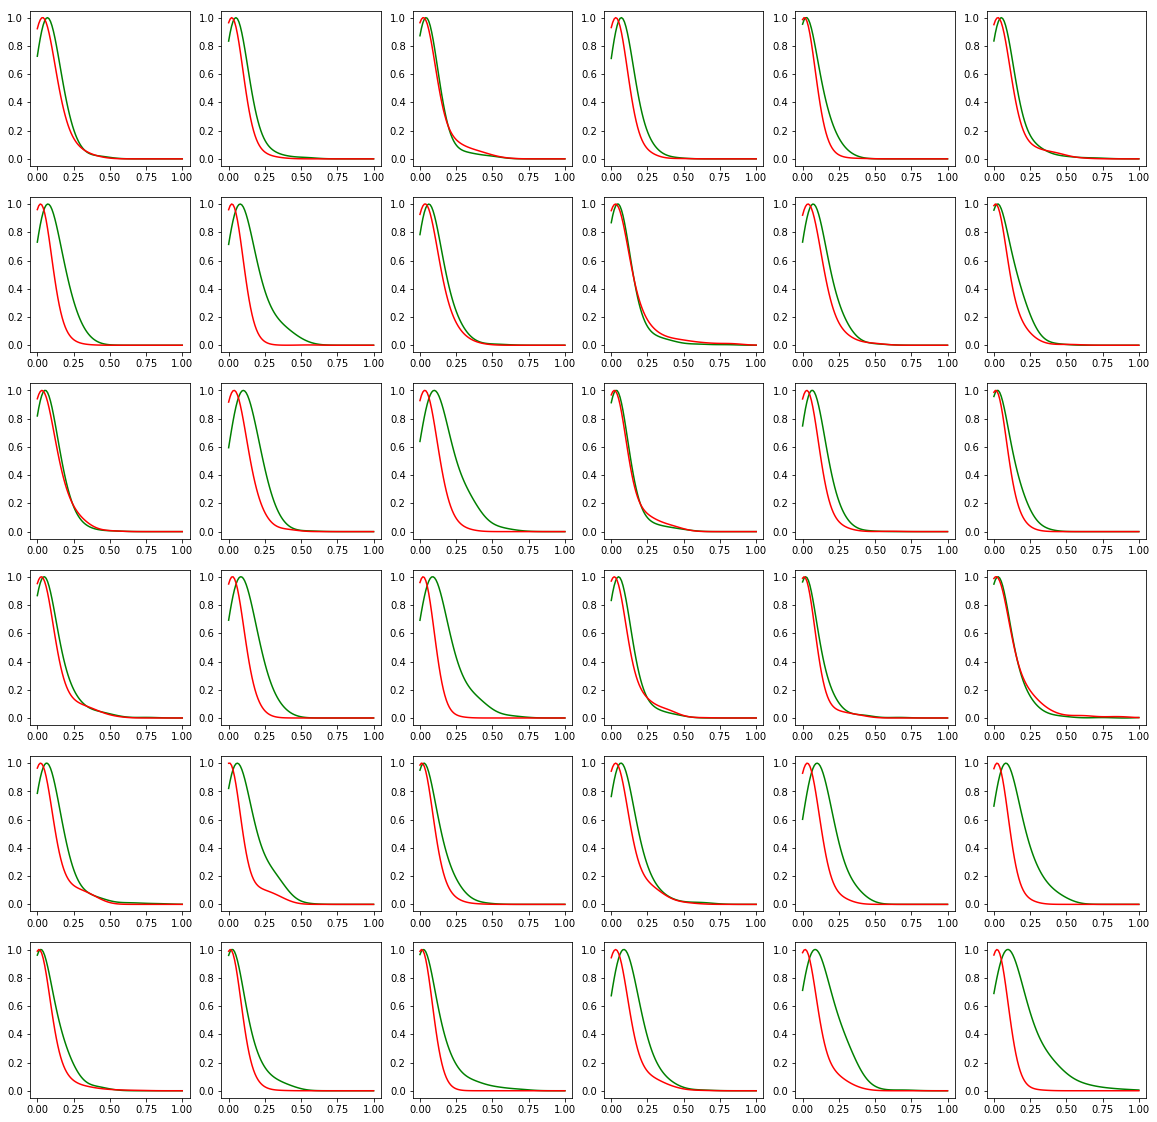

9 9 9


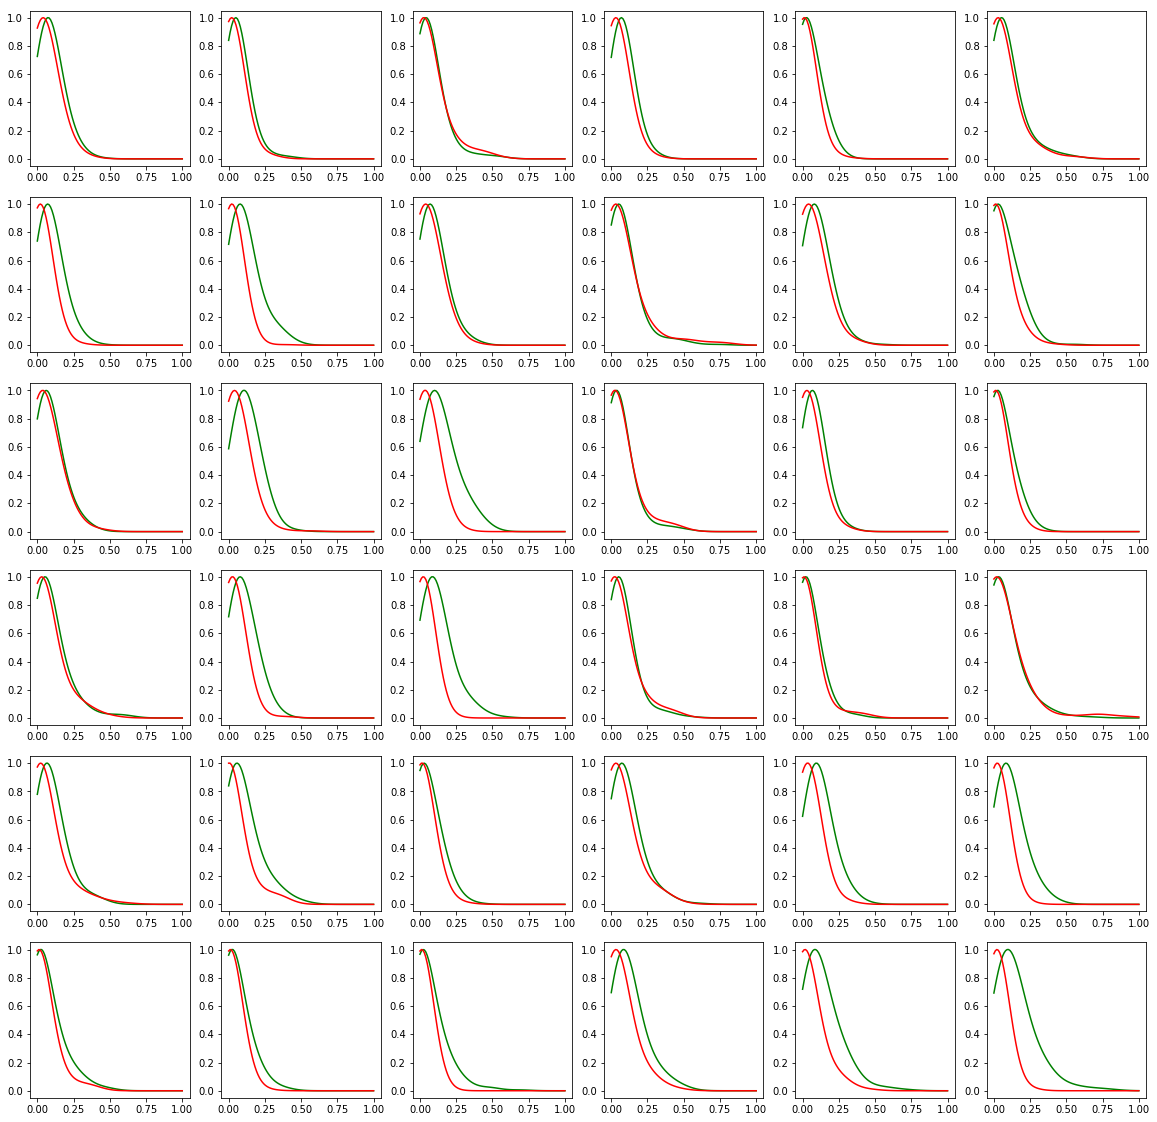

9 11 11


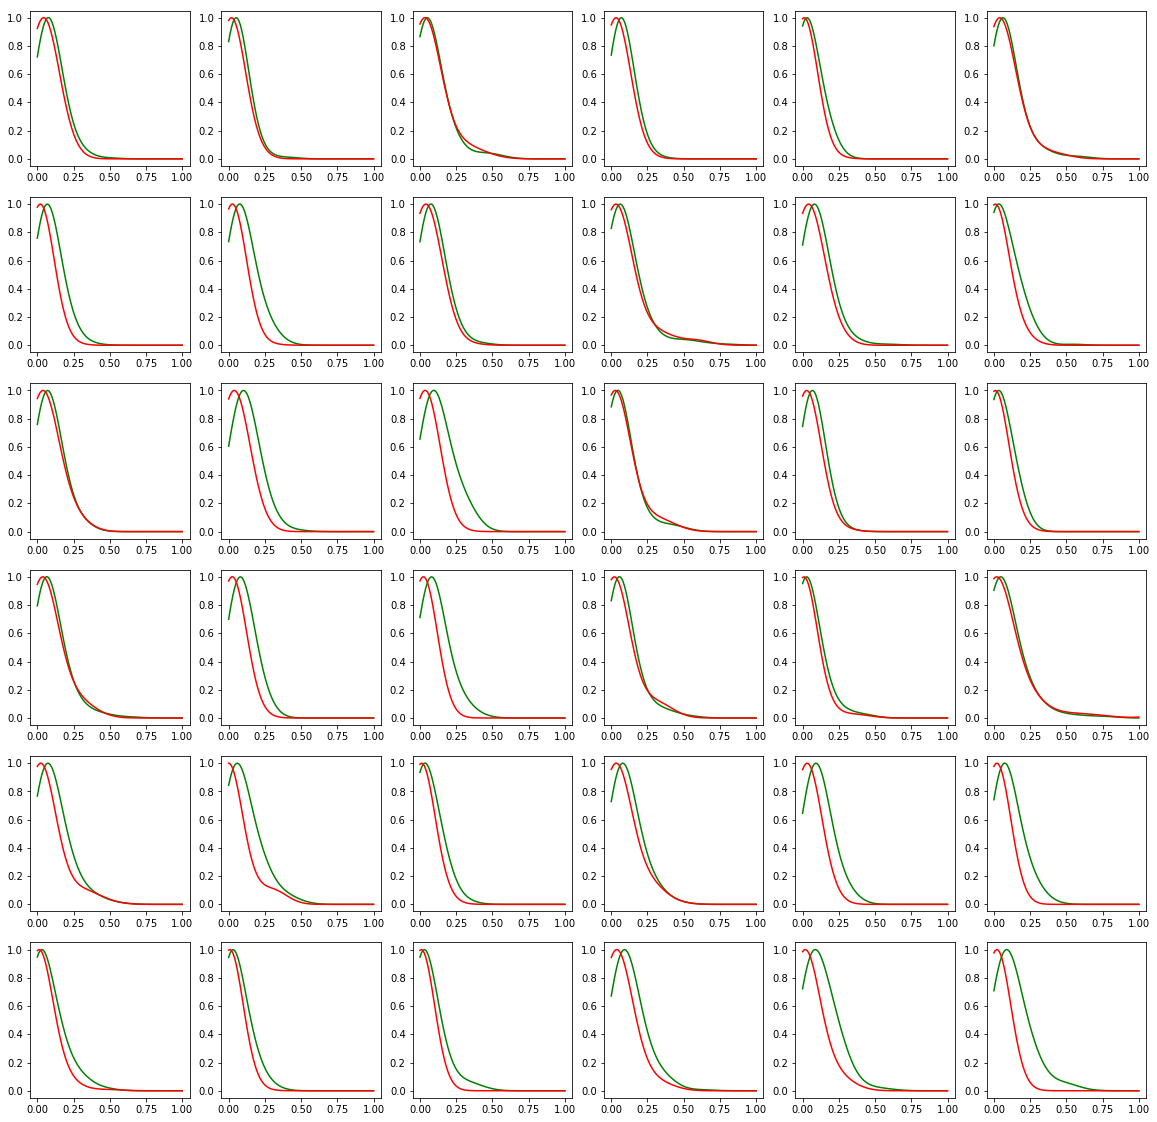

In [288]:
do_selem_sim()

3 3 3


/home/bstadt/Neurodata/nomadenv/lib/python3.5/site-packages/scipy/stats/kde.py:222: RuntimeWarning: underflow encountered in exp
  result[i] = sum(exp(-energy), axis=0)
/home/bstadt/Neurodata/nomadenv/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


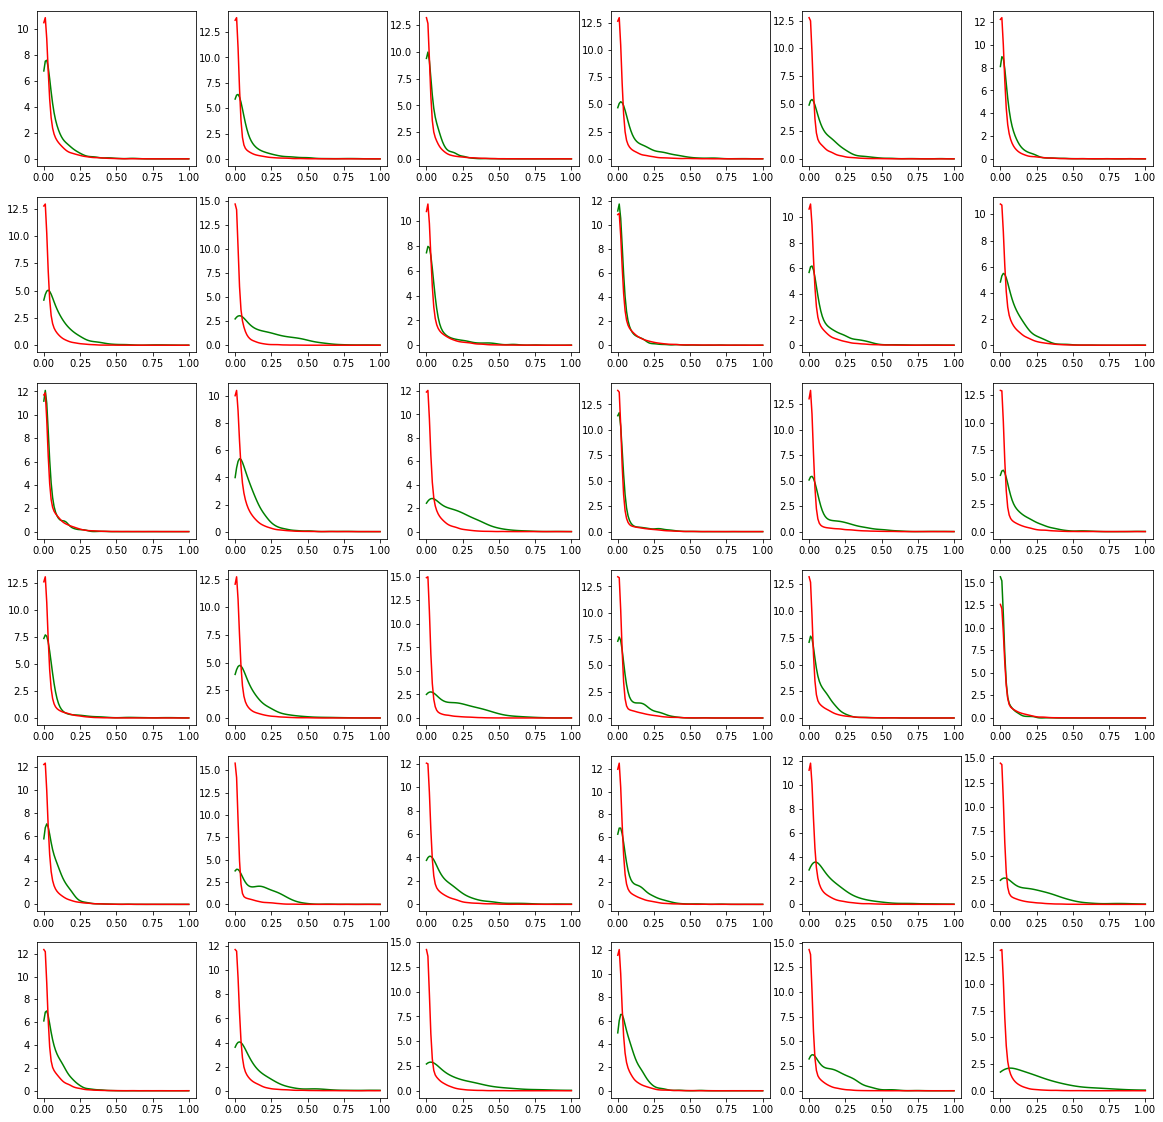

3 5 5


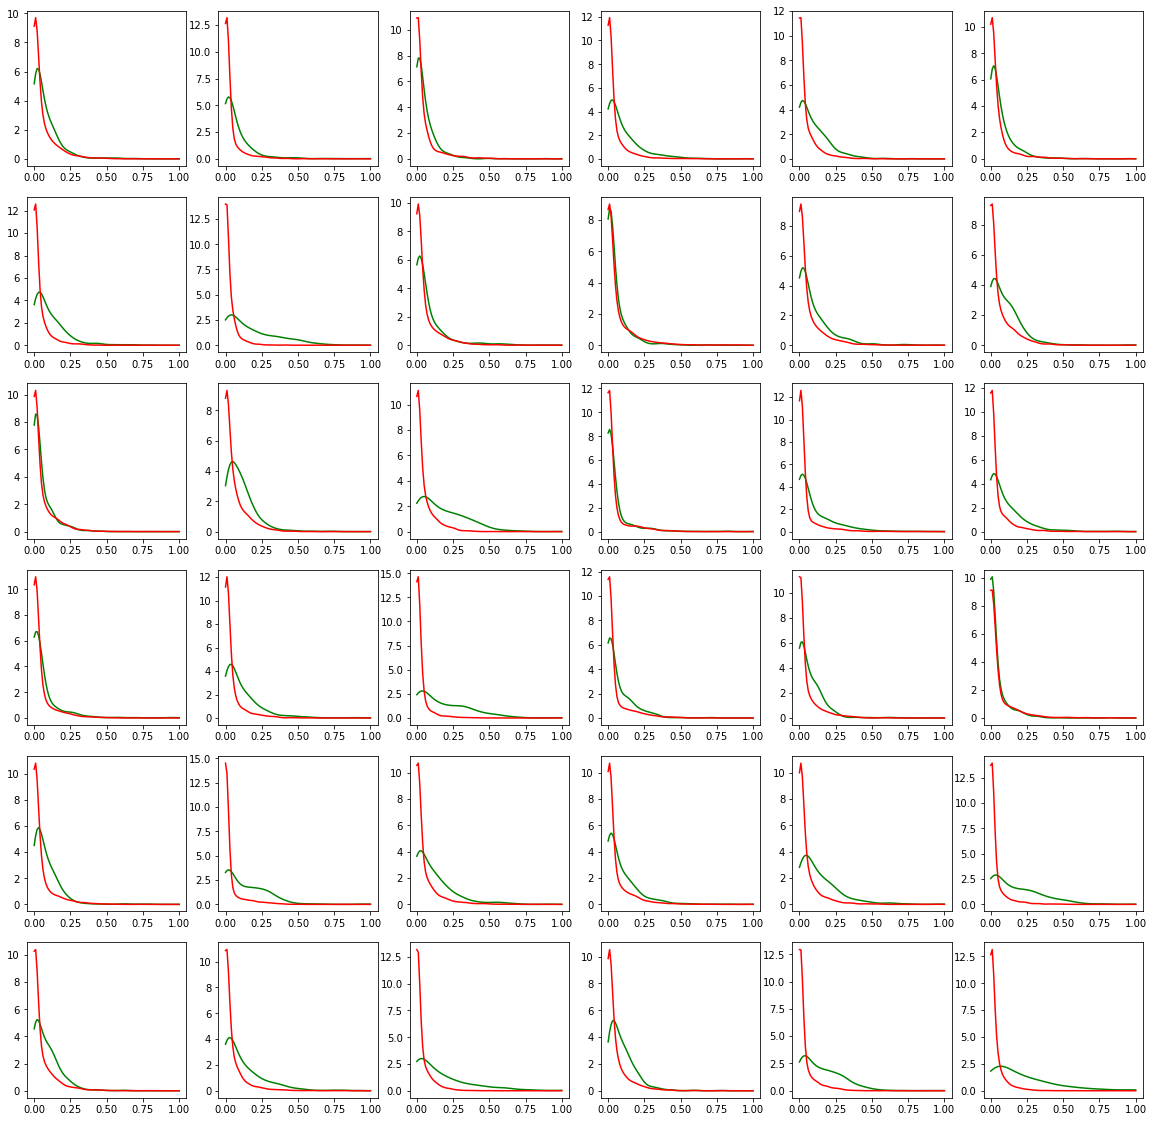

3 7 7


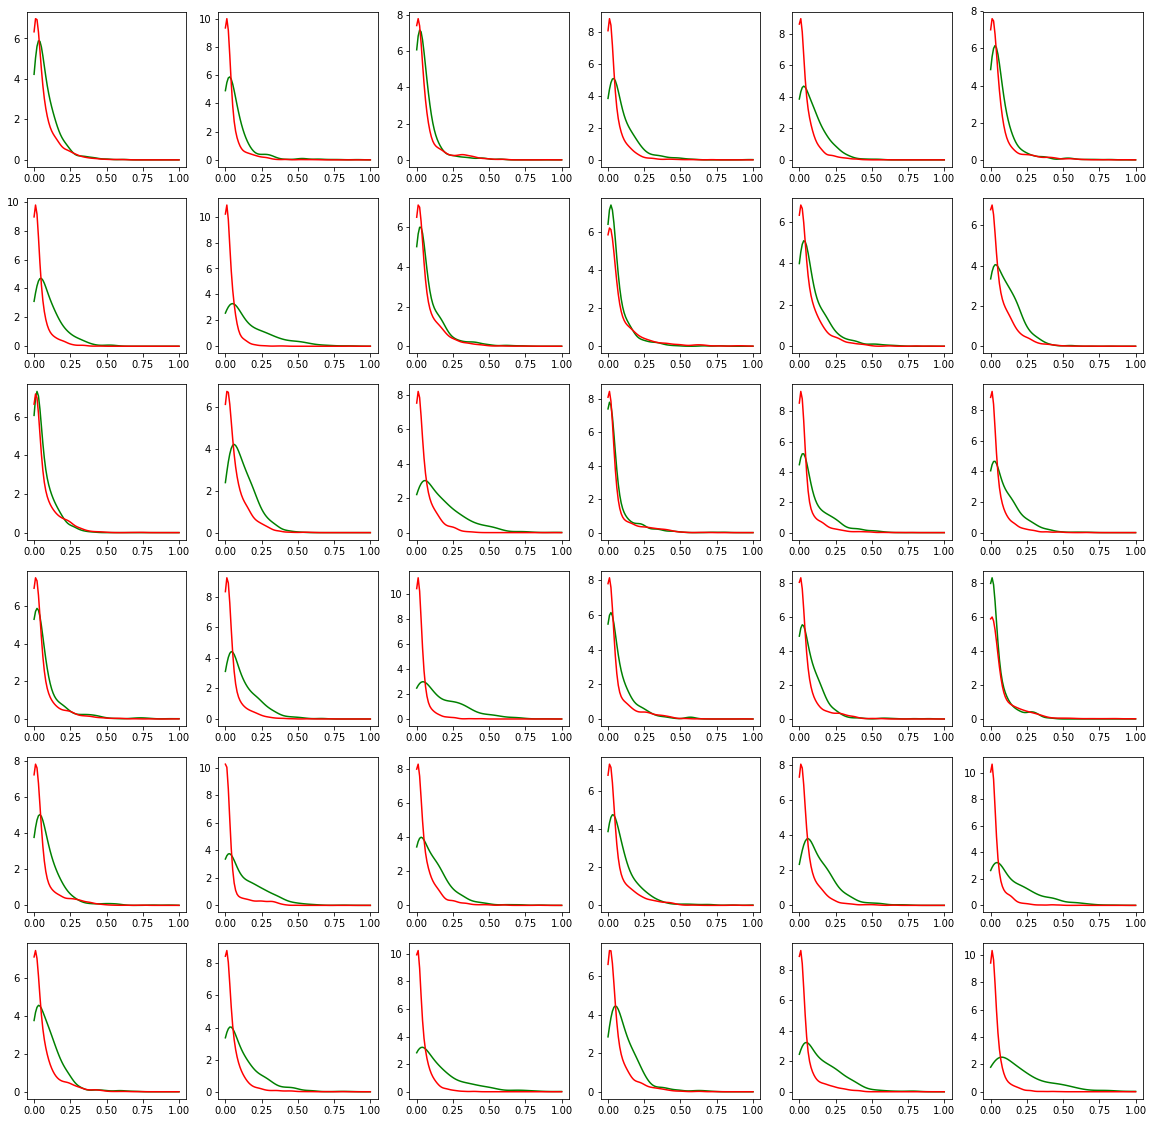

3 9 9


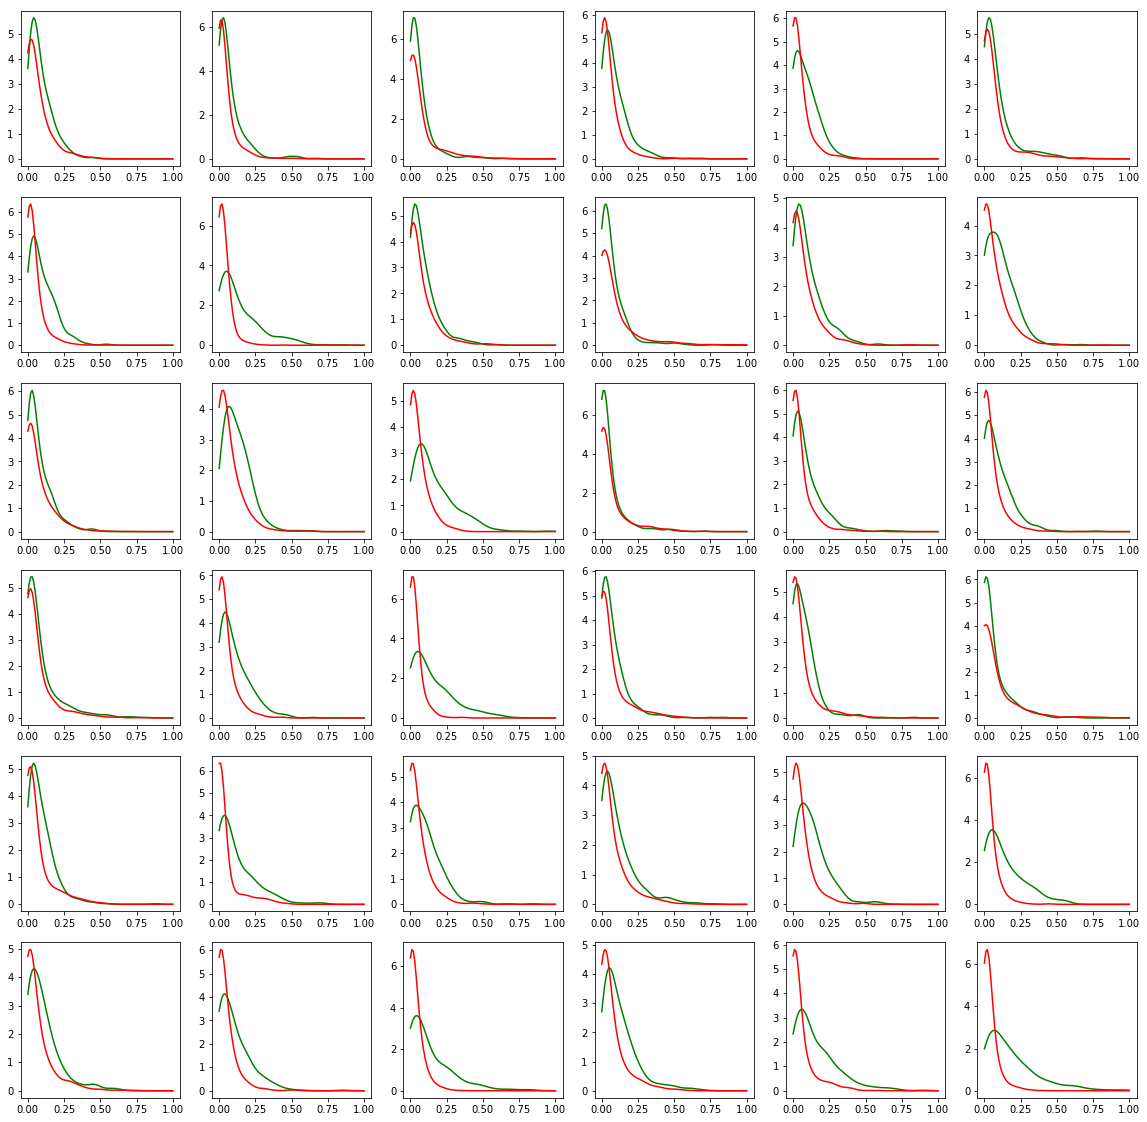

3 11 11


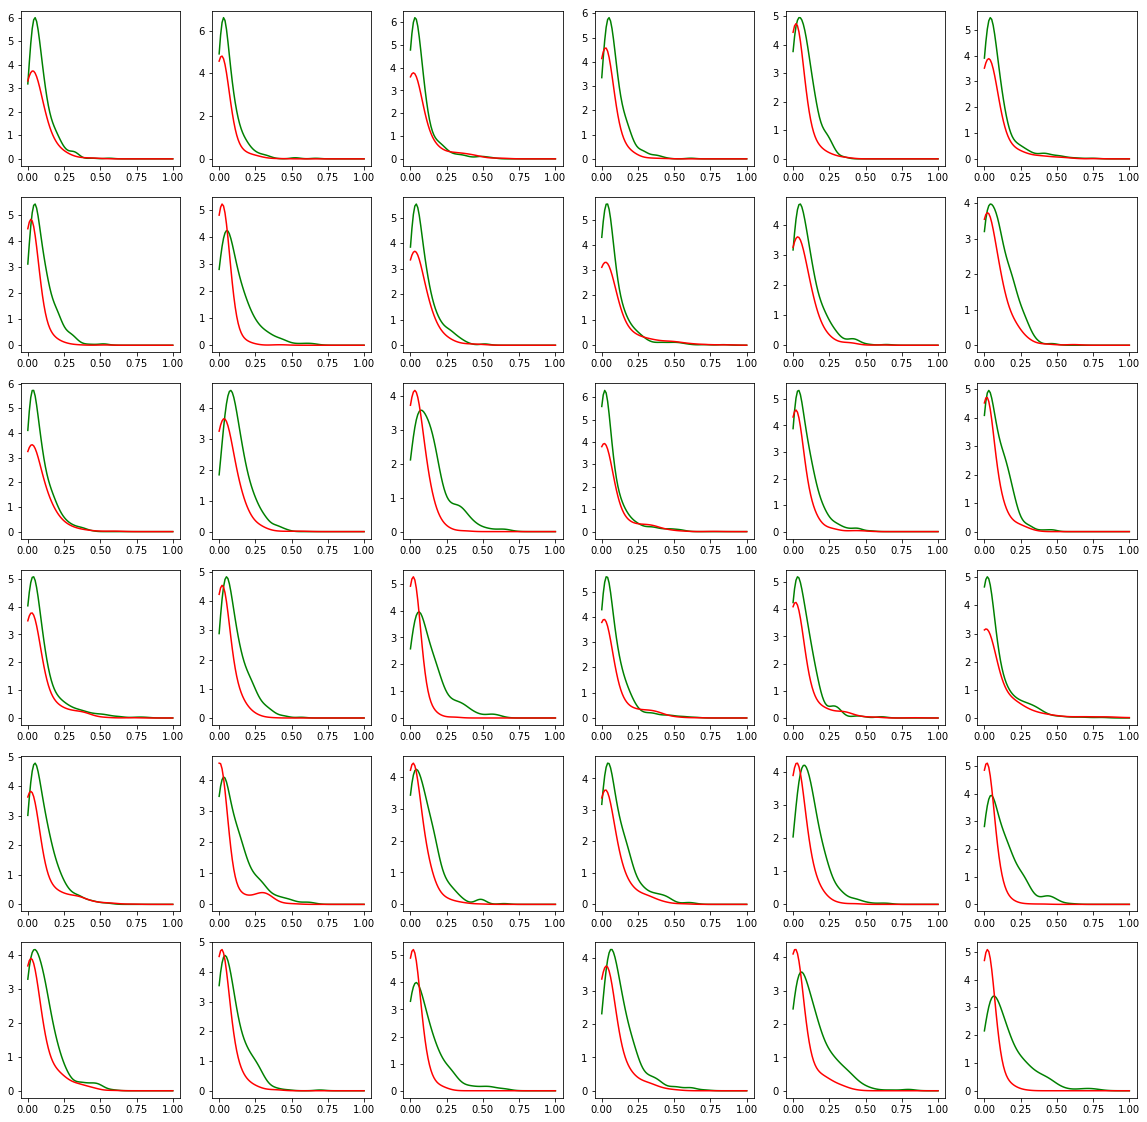

5 3 3


/home/bstadt/Neurodata/nomadenv/lib/python3.5/site-packages/scipy/stats/kde.py:224: RuntimeWarning: underflow encountered in true_divide
  result = result / self._norm_factor


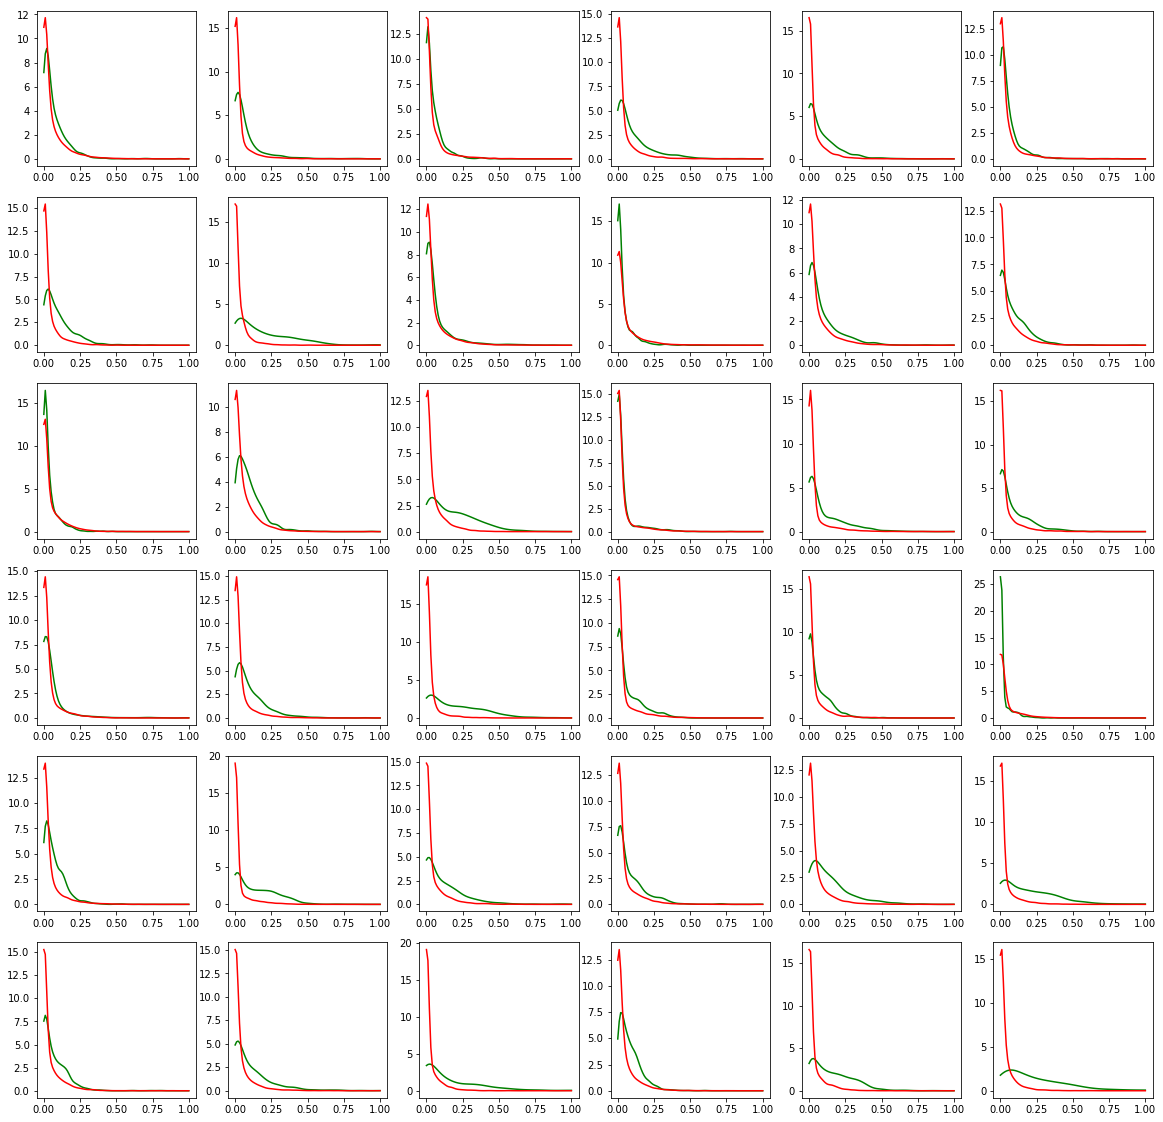

5 5 5


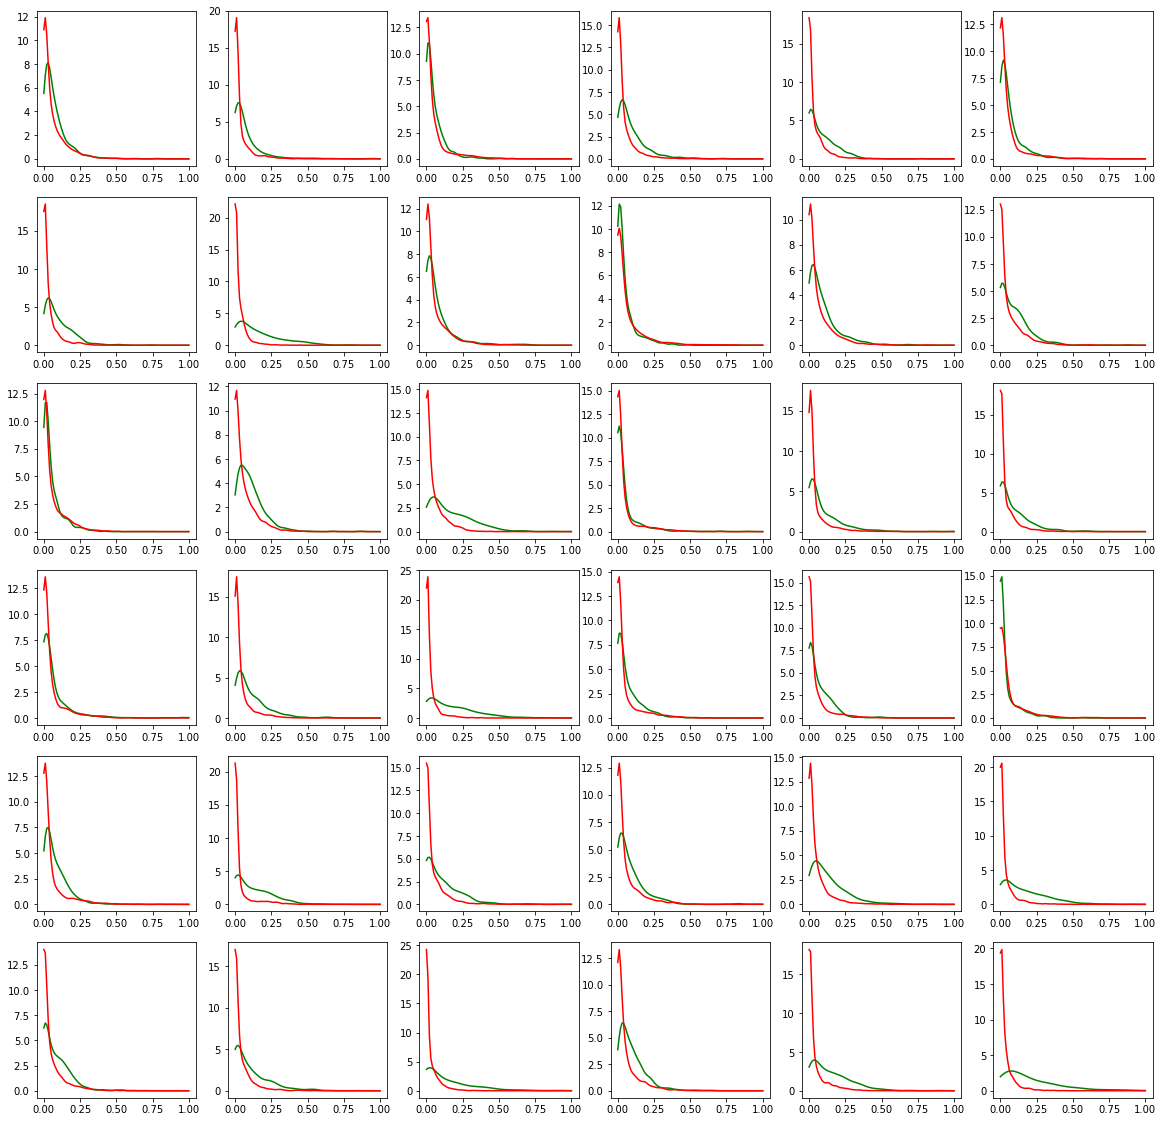

5 7 7


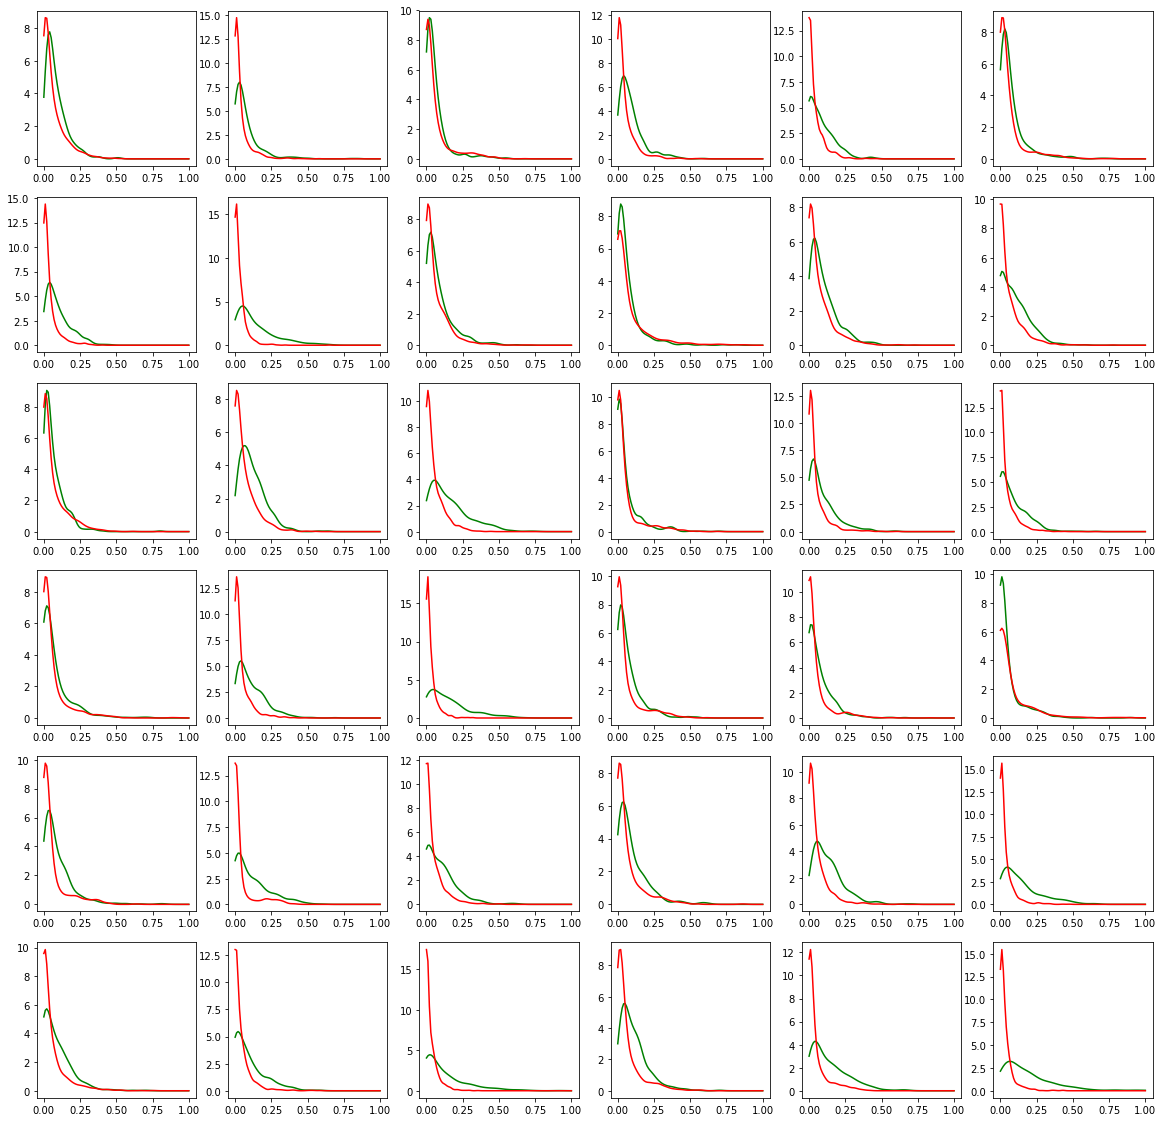

5 9 9


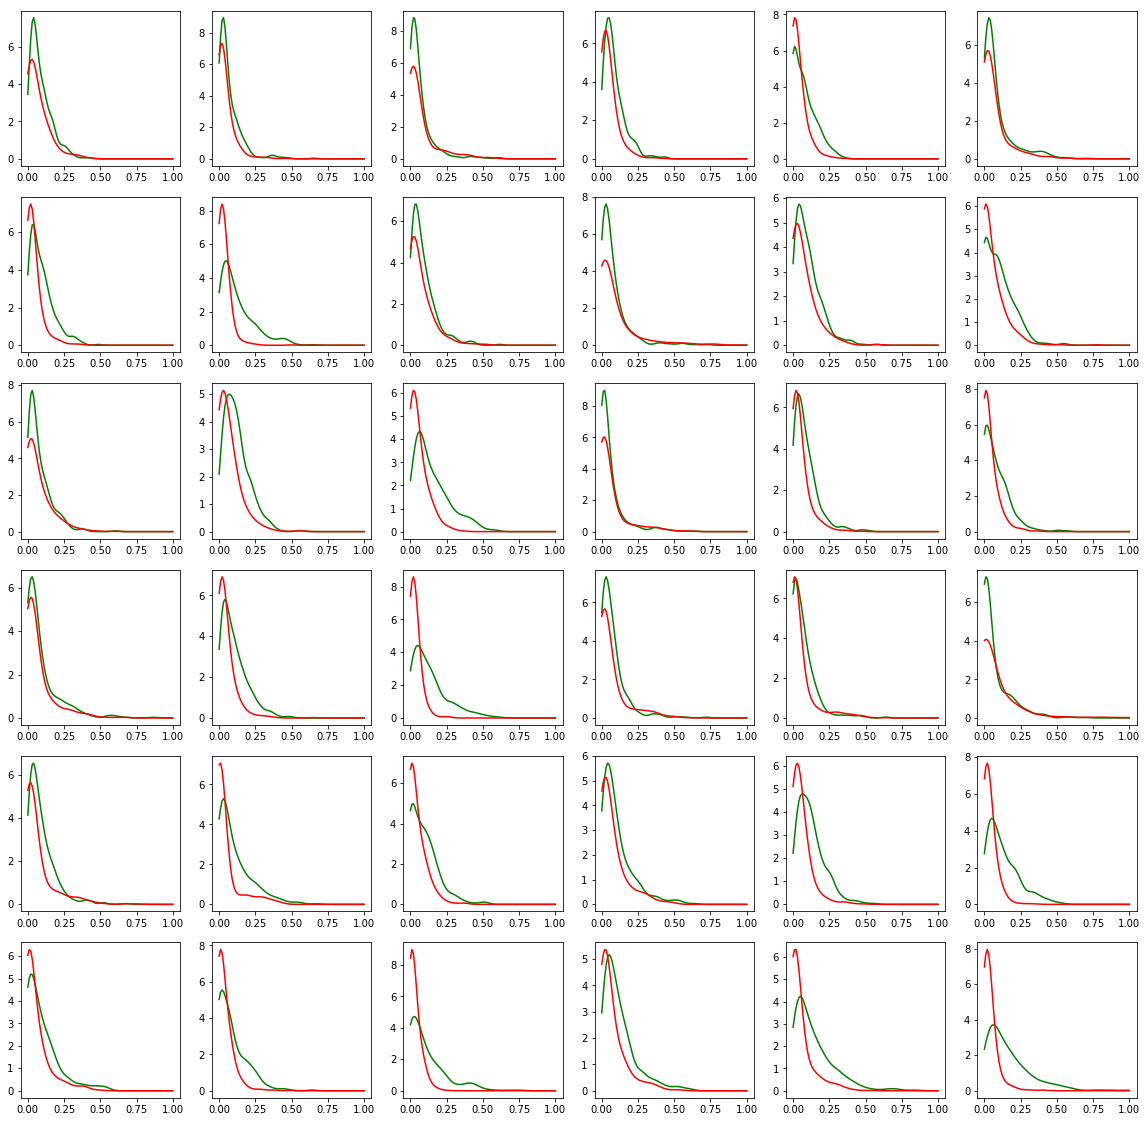

5 11 11


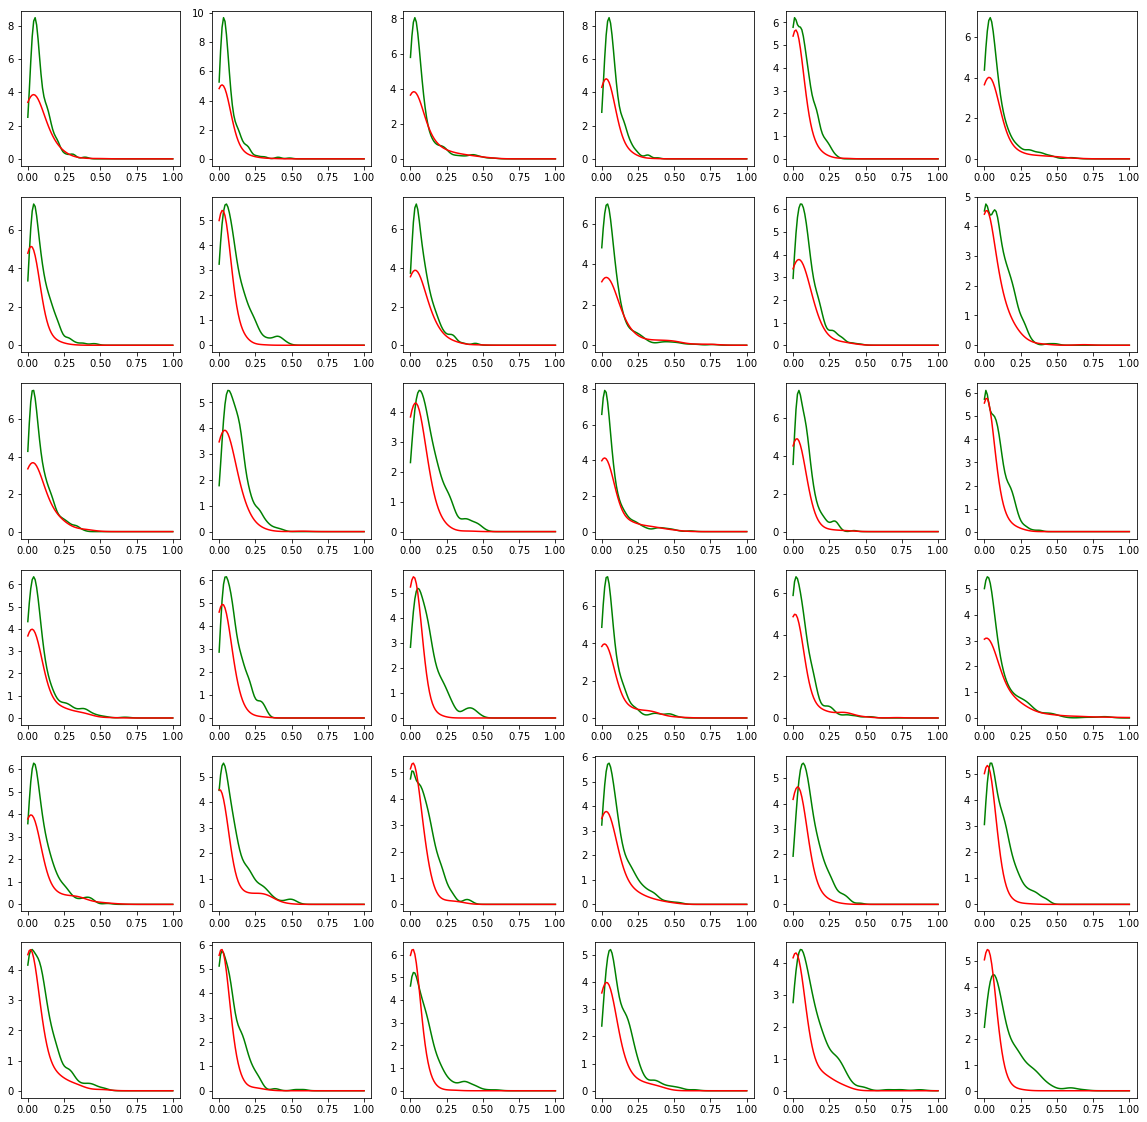

7 3 3


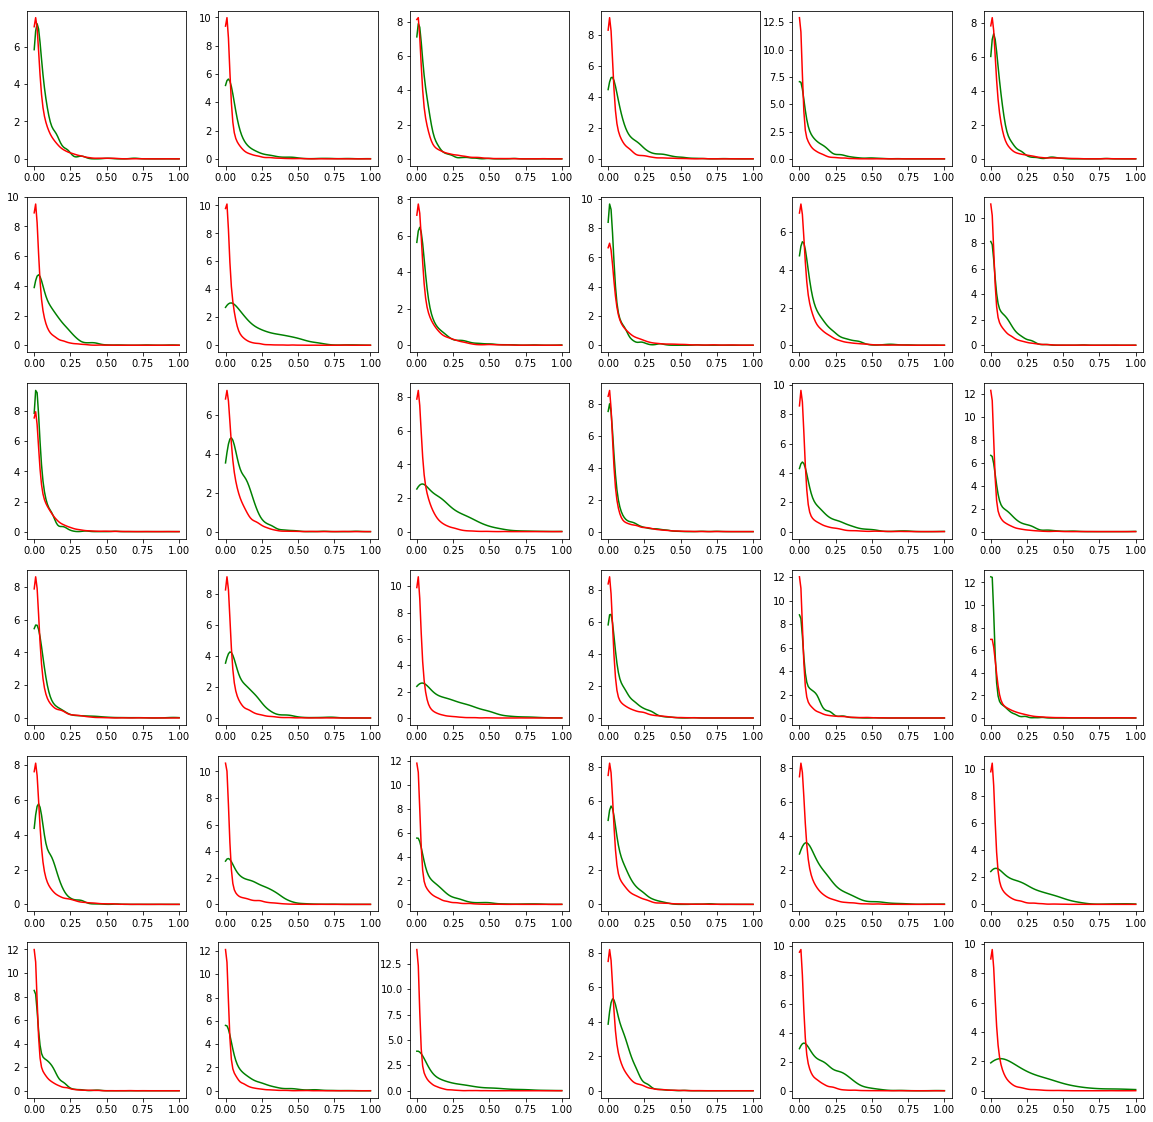

7 5 5


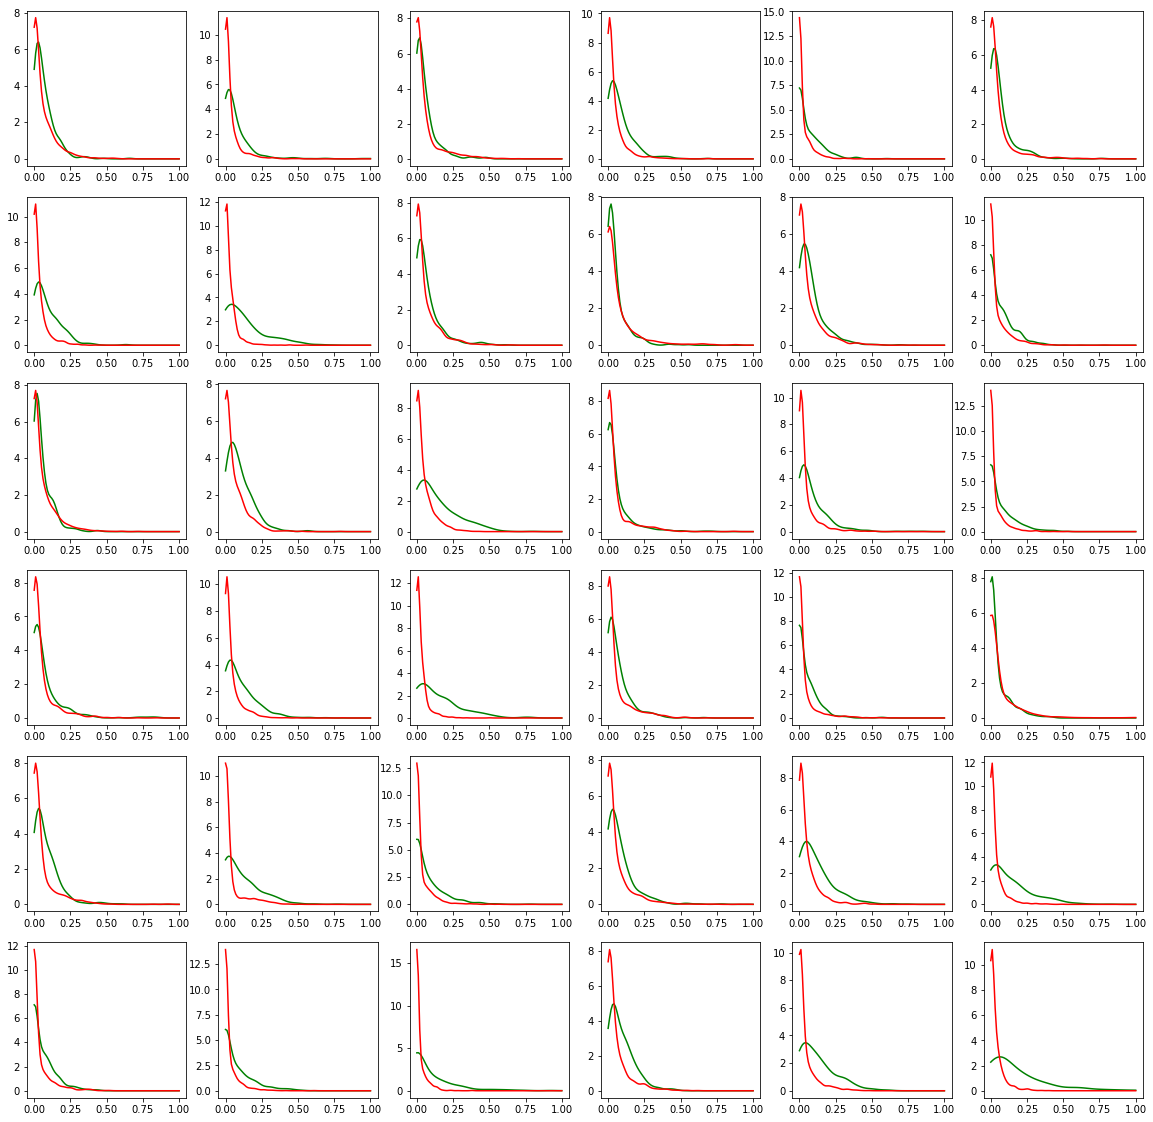

7 7 7


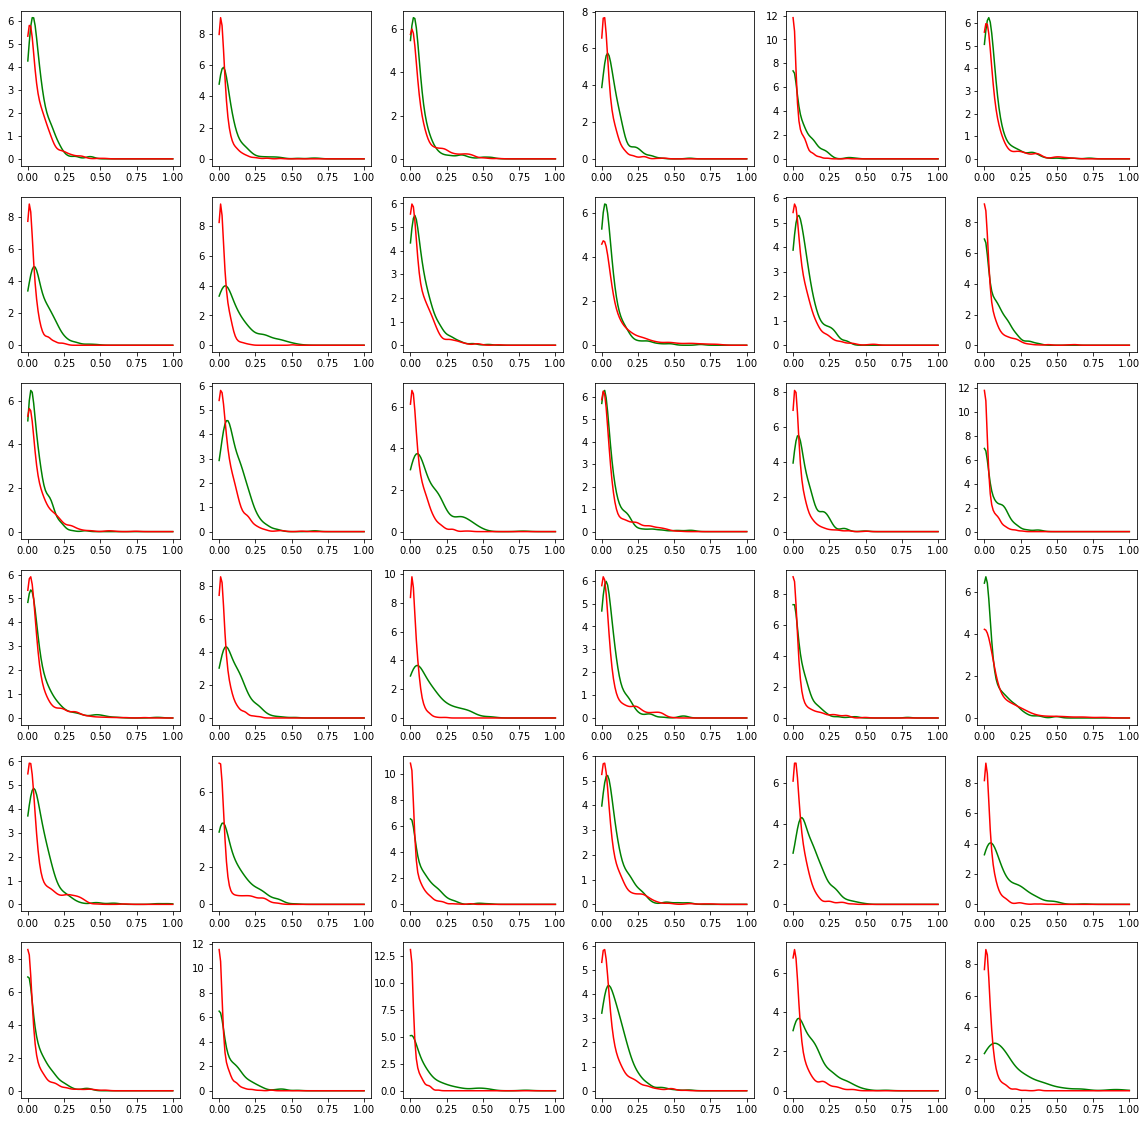

7 9 9


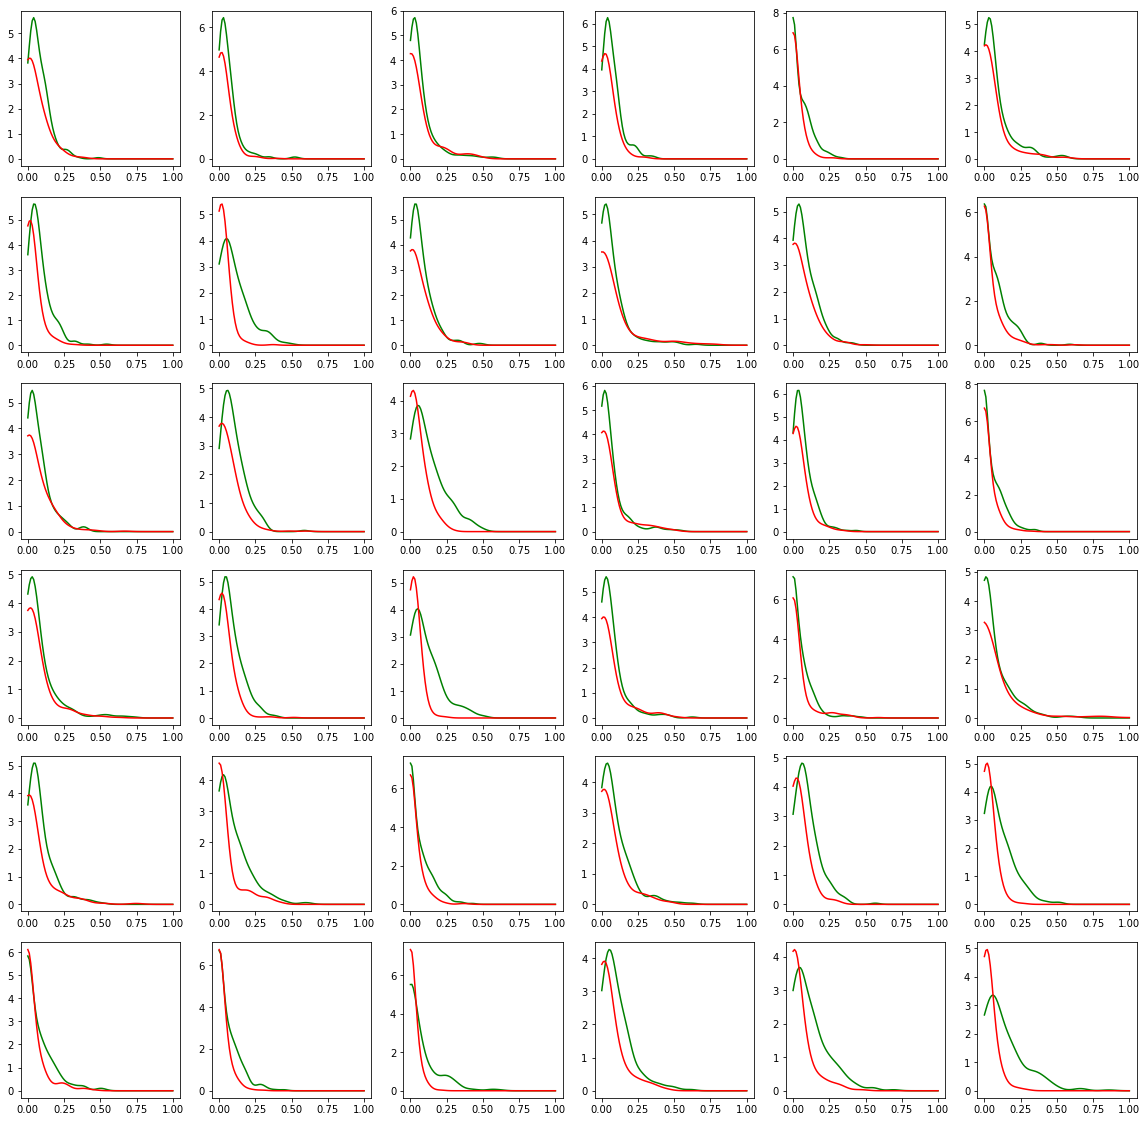

7 11 11


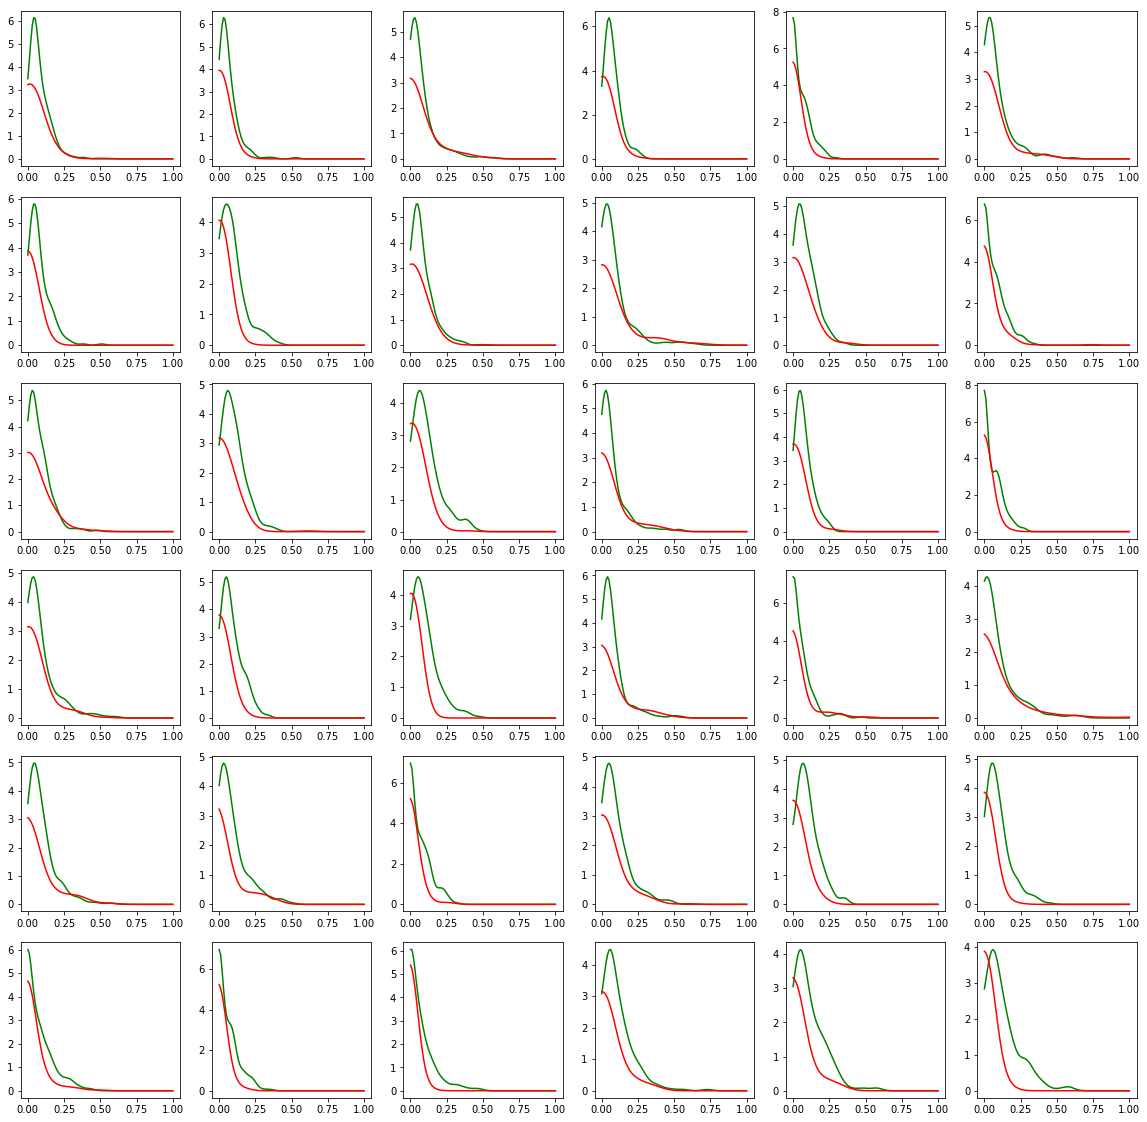

9 3 3


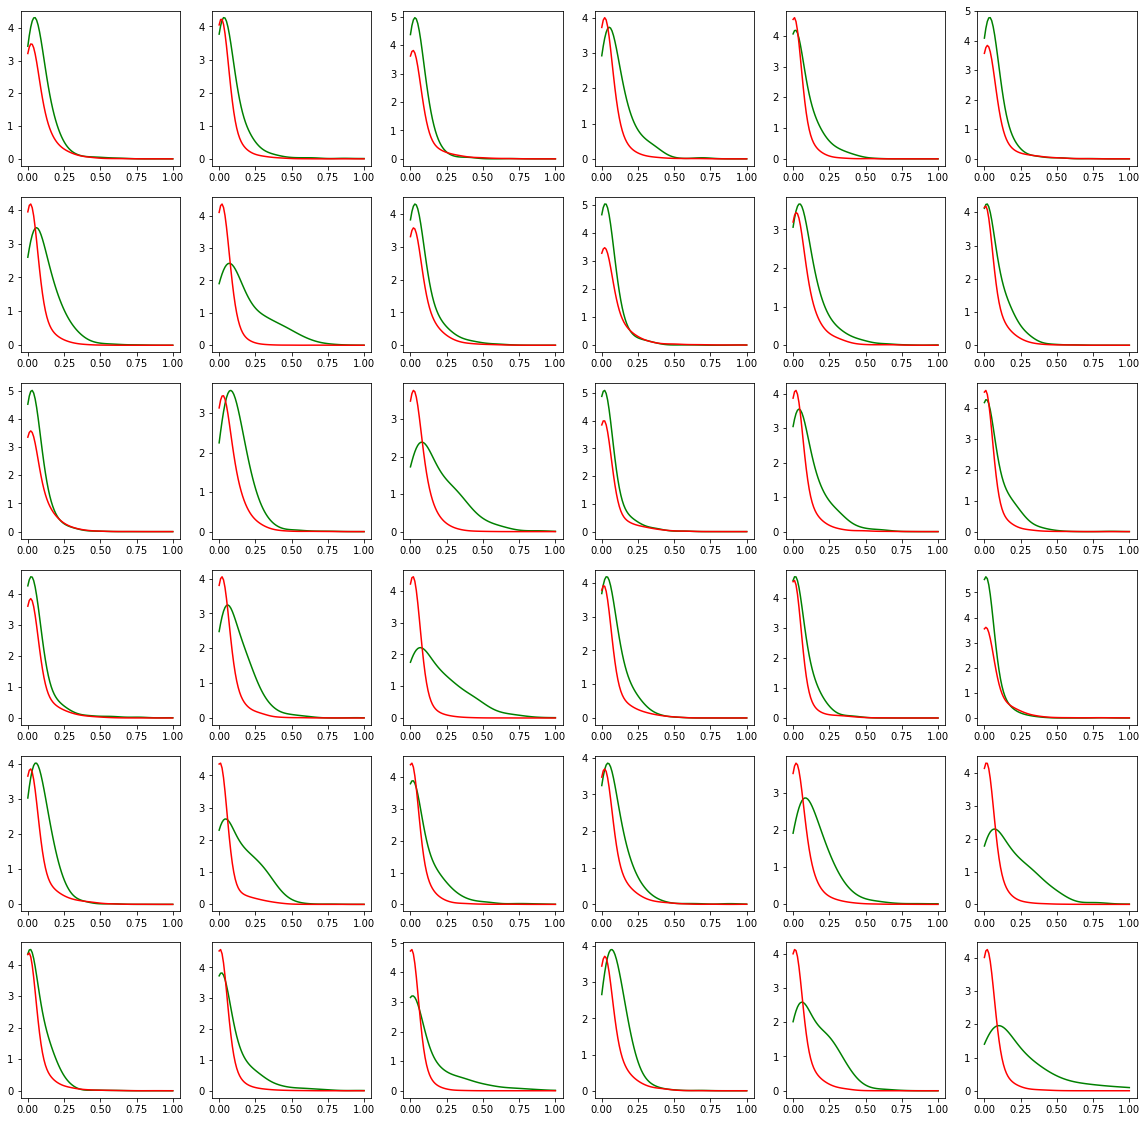

9 5 5


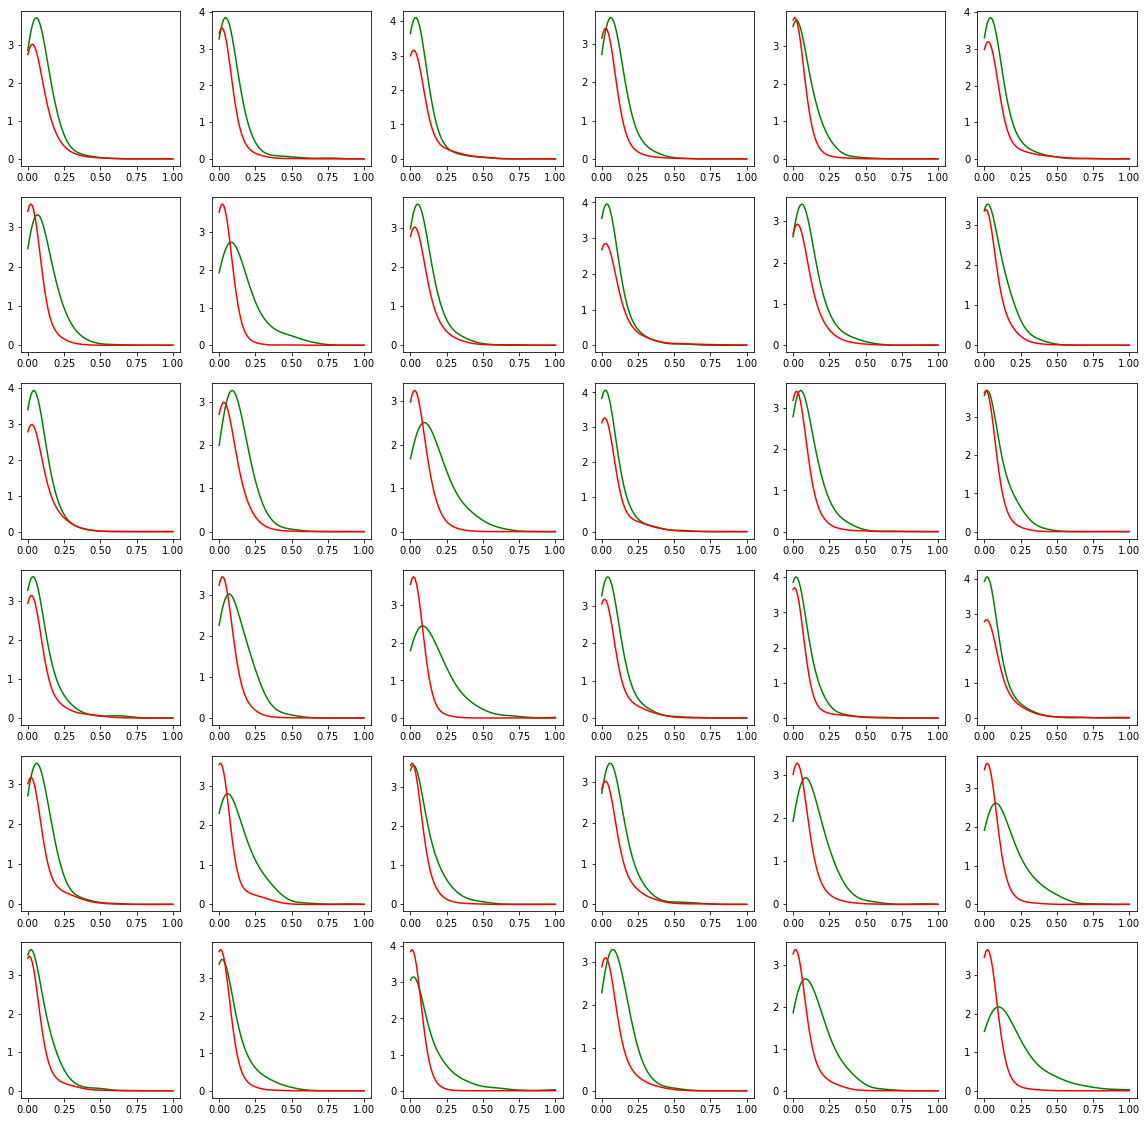

9 7 7


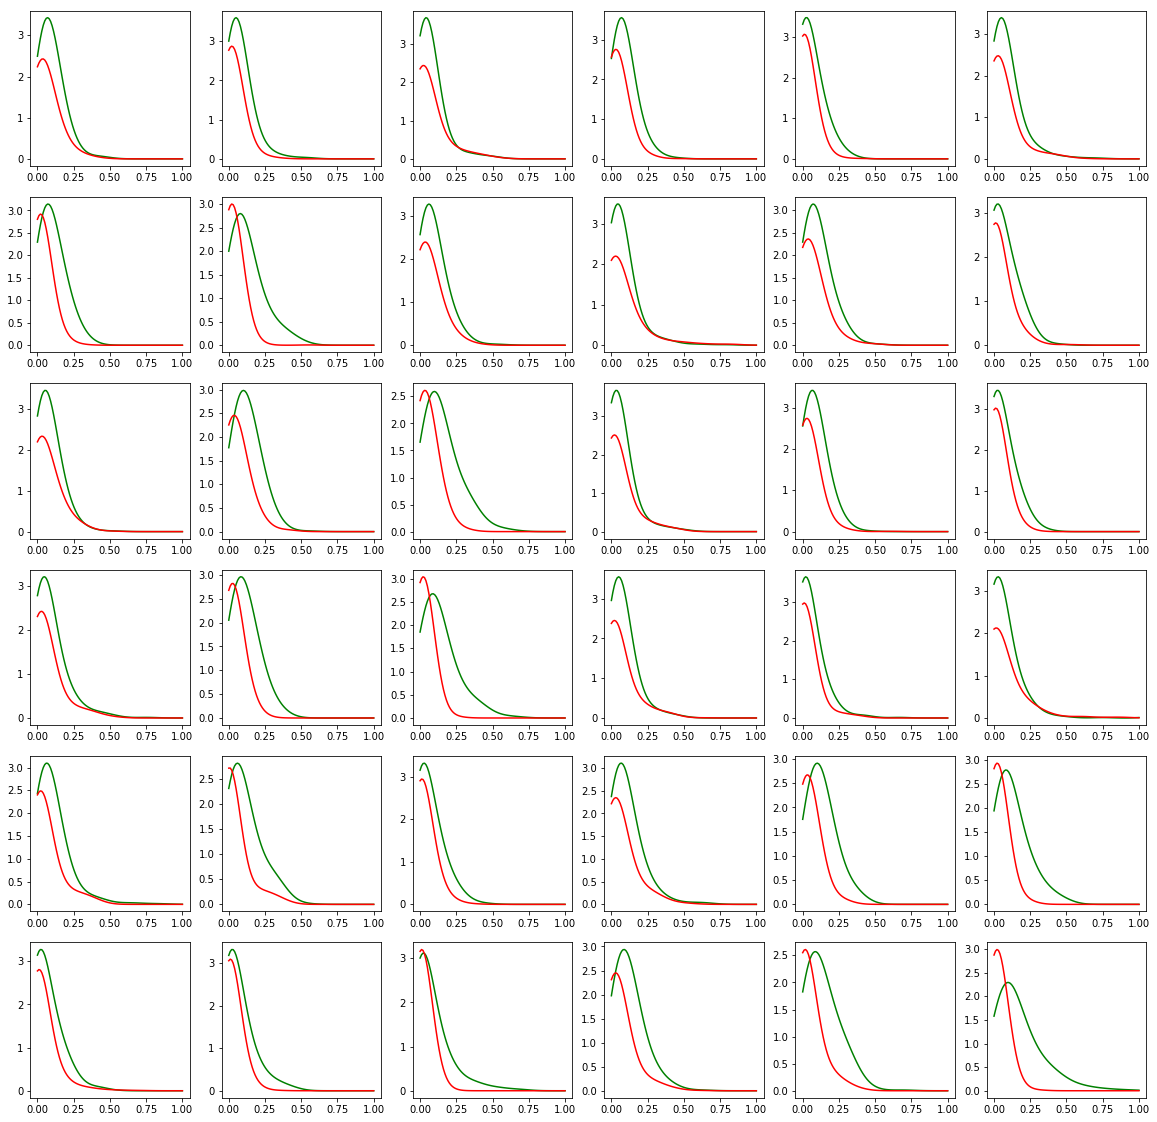

9 9 9


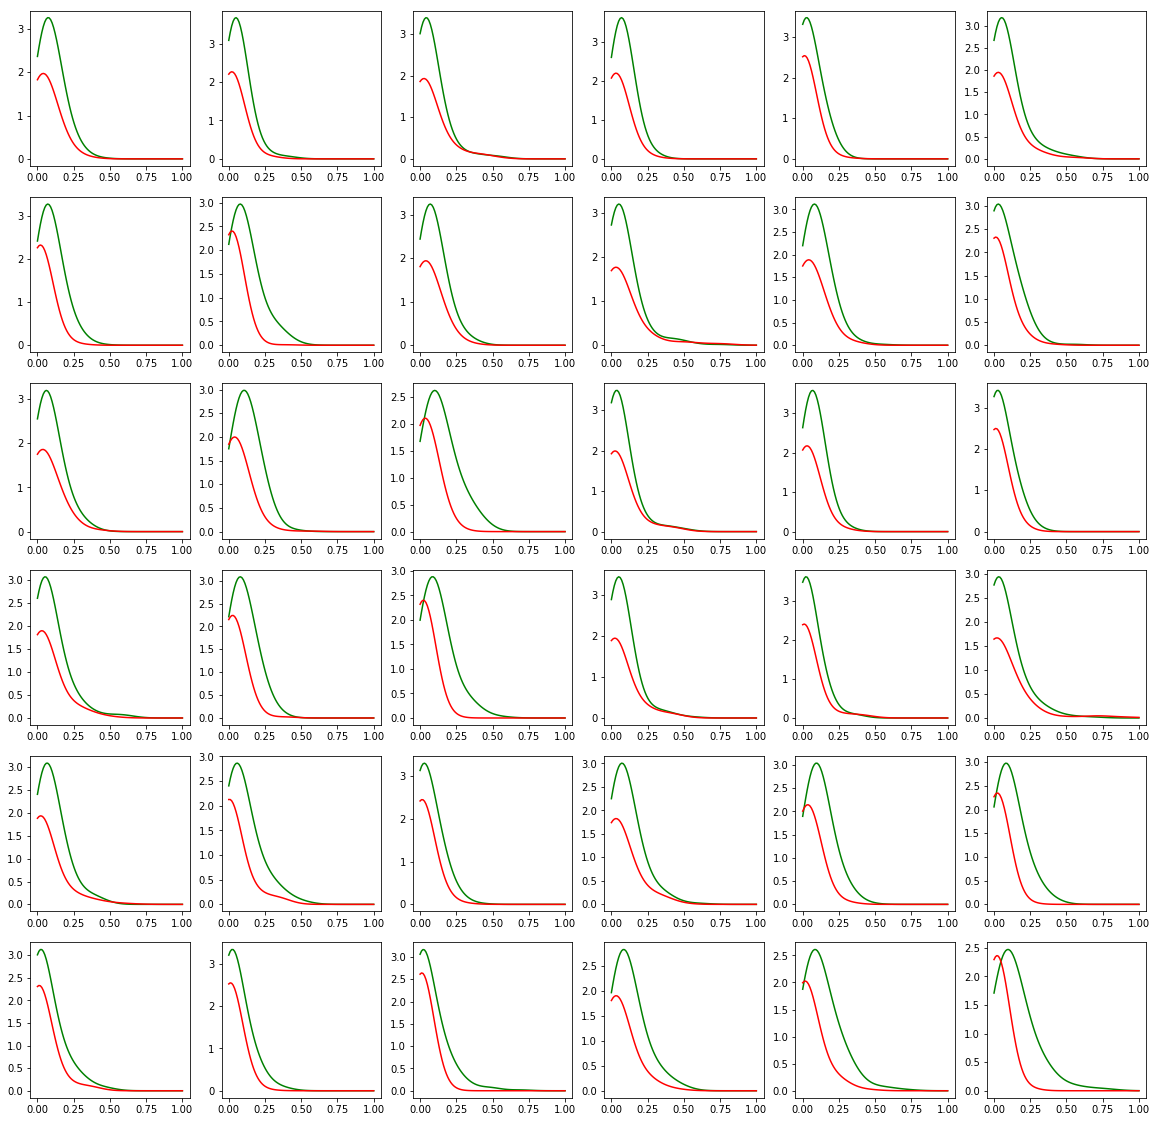

9 11 11


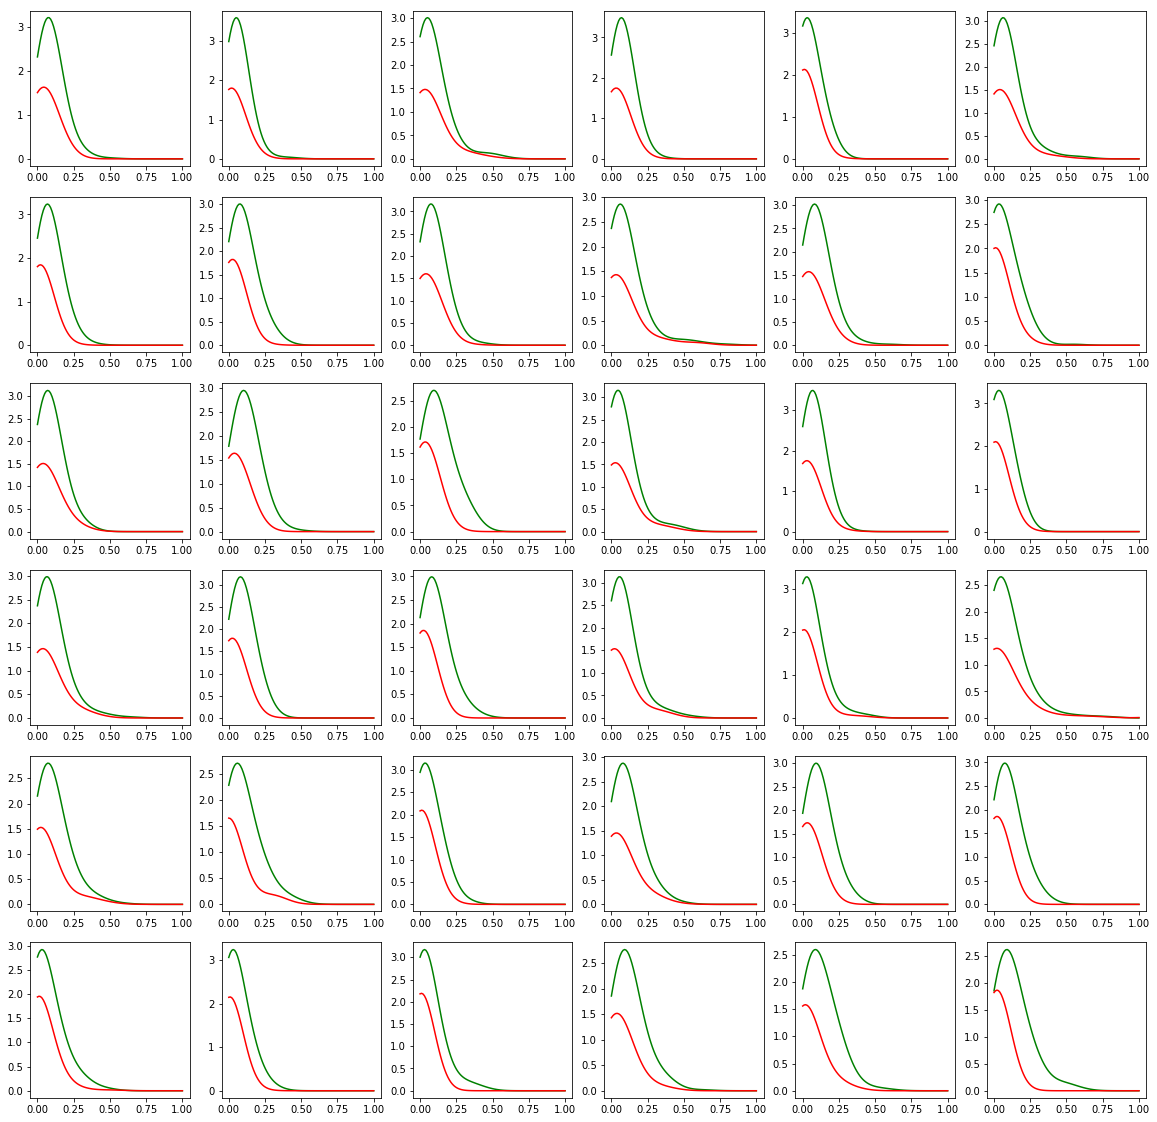

In [290]:
do_selem_sim(False)

In [312]:
def do_mag_sim(cutouts, selem, norm = True, plot=True):
    sim_chans = [elem for elem in cutouts.keys()\
                 if not 'annot' in elem and not 'EM' in elem]
    
    downsamp_annot = np.stack(cutouts['annotation'])
   
    combs = itertools.combinations(sim_chans, 2)
    xs = np.linspace(0.,5.,100)
    
    resultList = []
    i=1
    plt.figure(figsize = (20, 20))
    for achan, bchan in combs:
        
        intMap = np.add(np.stack([z_transform(elem) for elem in cutouts[achan]]),
                        np.stack([z_transform(elem) for elem in cutouts[bchan]]))
        
        intMap = np.nan_to_num(intMap)
        
        
        
        
        
        if plot:
            ax = plt.subplot(6, 6, i)
            '''
            if not (i-1)%6:
                ax.set_ylabel(achan)
            if i >= 31:
                ax.set_xlabel(achan)
            print(achan, bchan)
            '''''
            if norm:
                pos_kde = gaussian_kde(intMap[downsamp_annot > 0])
                neg_kde = gaussian_kde(intMap[downsamp_annot == 0])
                plt.plot(xs, pos_kde(xs)/np.max(pos_kde(xs)), c='g')
                plt.plot(xs, neg_kde(xs)/np.max(neg_kde(xs)), c='r')

            else:
                pos_kde = gaussian_kde(intMap[downsamp_annot > 0])
                neg_kde = gaussian_kde(intMap[downsamp_annot == 0])
                plt.plot(xs, pos_kde(xs), c='g')
                plt.plot(xs, neg_kde(xs), c='r')

        resultList.append([achan, bchan, intMap])
        i+=1
       
    if plot:
        plt.show()
        
    return resultList


/home/bstadt/Neurodata/nomadenv/lib/python3.5/site-packages/scipy/stats/kde.py:222: RuntimeWarning: underflow encountered in exp
  result[i] = sum(exp(-energy), axis=0)
/home/bstadt/Neurodata/nomadenv/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


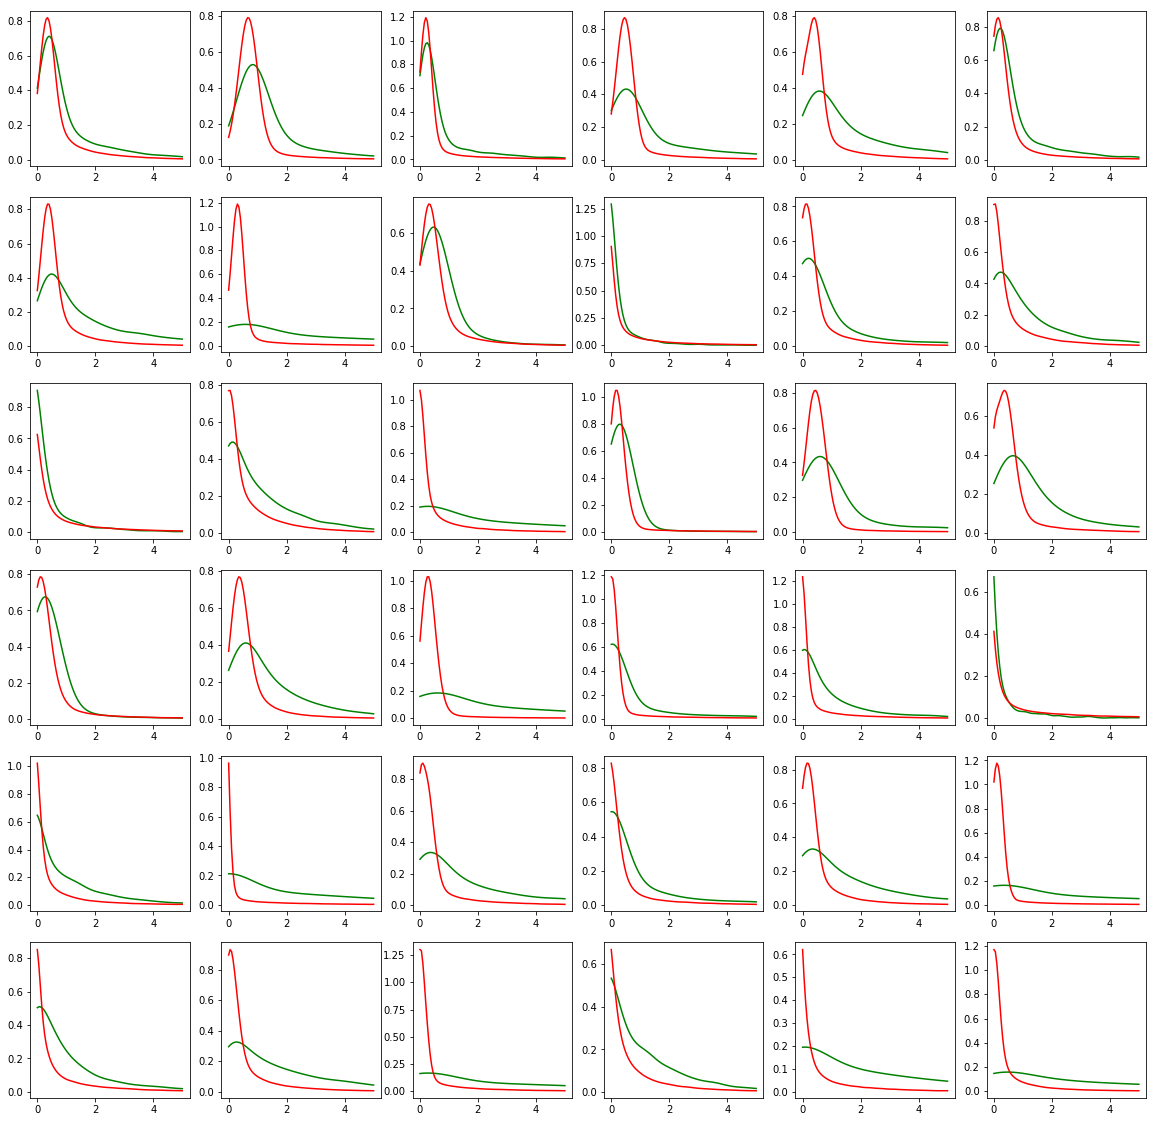

In [340]:
out = do_mag_sim(cutouts, (3, 5, 5), norm=False)

In [355]:
def do_mag_cov_sim(cutouts, selem, norm = True, plot=True):
    sim_chans = [elem for elem in cutouts.keys()\
                 if not 'annot' in elem and not 'EM' in elem]
    
    downsamp_annot = np.stack(cutouts['annotation'])
   
    combs = itertools.combinations(sim_chans, 2)
    xs = np.linspace(0.,2.,100)
    
    resultList = []
    k=1
    plt.figure(figsize = (20, 20))
    for achan, bchan in combs:
        
        intMap = np.add(np.stack([z_transform(elem) for elem in cutouts[achan]]),
                        np.stack([z_transform(elem) for elem in cutouts[bchan]]))
        
        intMap = np.nan_to_num(intMap)
        
        covMap = compute_pairwise_vol_cov(np.stack([z_transform(elem) for elem in cutouts[achan]]),
                                          np.stack([z_transform(elem) for elem in cutouts[bchan]]),
                                          selem)
        covMap = np.nan_to_num(covMap)
        covMap = np.stack([imresize(elem, intMap[0].shape, interp='nearest') for elem in covMap])
        zUpsampleFactor = intMap.shape[0]//covMap.shape[0]
        zUpsampleOffset = intMap.shape[0]%covMap.shape[0]
        toStack = []
        for i in range(covMap.shape[0]):
            for j in range(zUpsampleFactor):
                toStack.append(covMap[i])
        for i in range(zUpsampleOffset):
                toStack.append(covMap[-1])
        interpCovMap = np.stack(toStack)
        interpCovMap = interpCovMap/np.max(interpCovMap)
        
        finalMap = intMap * interpCovMap
        
        if plot:
            ax = plt.subplot(6, 6, k)
            '''
            if not (i-1)%6:
                ax.set_ylabel(achan)
            if i >= 31:
                ax.set_xlabel(achan)
            print(achan, bchan)
            '''''
            if norm:
                pos_kde = gaussian_kde(finalMap[downsamp_annot > 0])
                neg_kde = gaussian_kde(finalMap[downsamp_annot == 0])
                plt.plot(xs, pos_kde(xs)/np.max(pos_kde(xs)), c='g')
                plt.plot(xs, neg_kde(xs)/np.max(neg_kde(xs)), c='r')

            else:
                pos_kde = gaussian_kde(finalMap[downsamp_annot > 0])
                neg_kde = gaussian_kde(finalMap[downsamp_annot == 0])
                plt.plot(xs, pos_kde(xs), c='g')
                plt.plot(xs, neg_kde(xs), c='r')

        resultList.append([achan, bchan, intMap])
        k+=1
       
    if plot:
        plt.show()
        
    return resultList


/home/bstadt/Neurodata/nomadenv/lib/python3.5/site-packages/scipy/stats/kde.py:222: RuntimeWarning: underflow encountered in exp
  result[i] = sum(exp(-energy), axis=0)
/home/bstadt/Neurodata/nomadenv/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


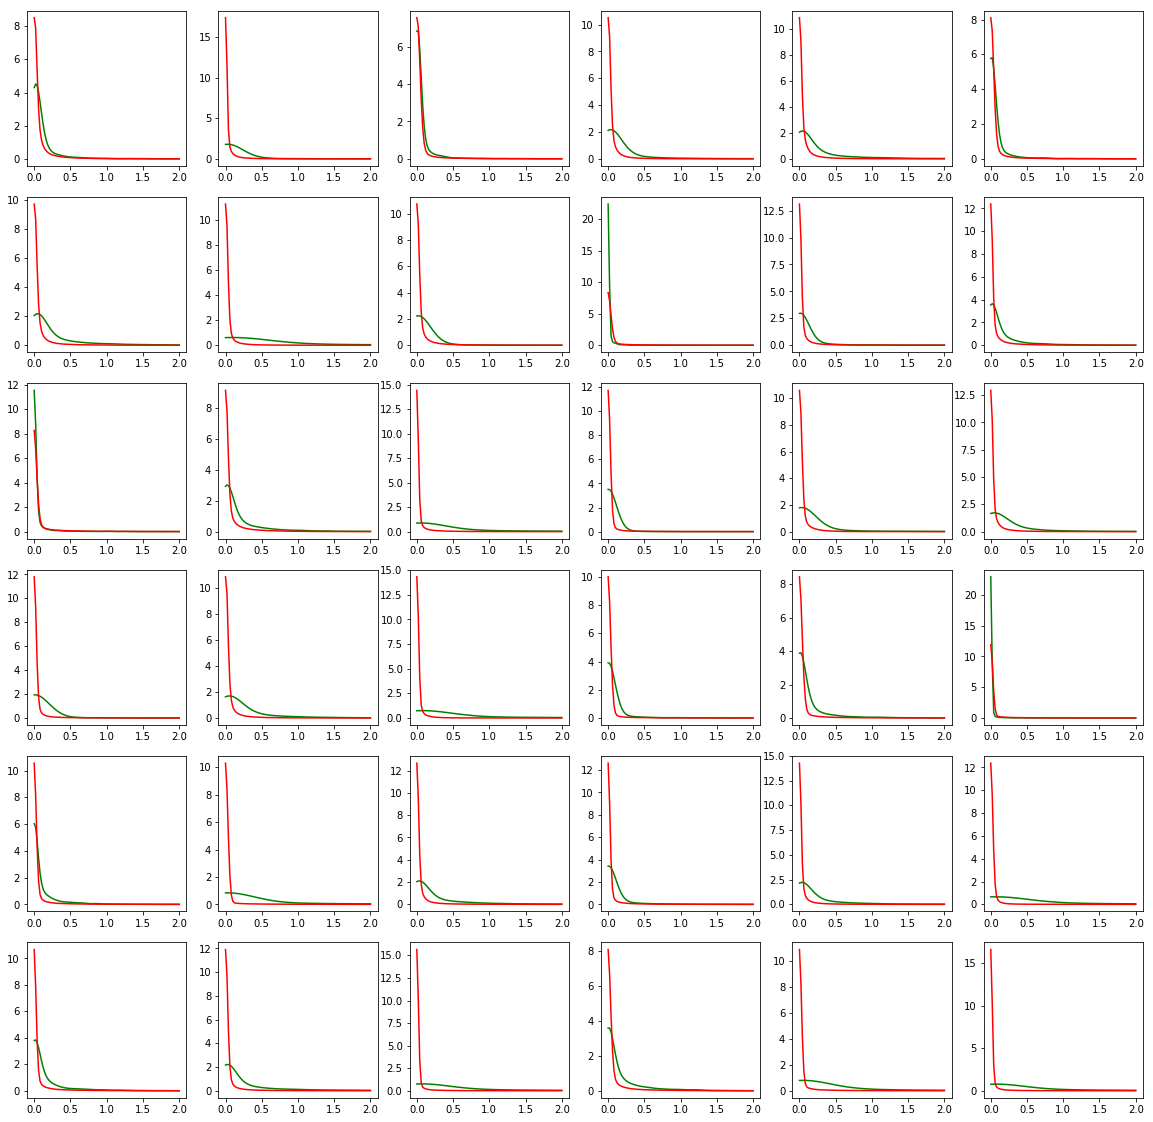

In [356]:
out = do_mag_cov_sim(cutouts, (3, 5, 5), norm=False)